In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install numpy==1.24.0

Note: you may need to restart the kernel to use updated packages.


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [4]:
a_d=pd.read_csv("application_data.csv")
a_d.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
#inspection

a_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Data quality check

pd.set_option('display.max_rows',200)
a_d.isnull().mean()*100 #we get in terms of percentage

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [7]:
#dropping missing values greater than 45%

percentage=45
threshold=int(((100-percentage)/100)*a_d.shape[0]+1)

a=a_d.dropna(axis=1 ,thresh=threshold)
a.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [8]:
a.shape

(307511, 73)

In [9]:
a.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [10]:
a.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [11]:
a.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [12]:
a.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [13]:
a.OCCUPATION_TYPE.fillna("others",inplace=True)

In [14]:
a.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [15]:
a.OCCUPATION_TYPE.value_counts(normalize=True)*100

others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [16]:
a.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [17]:
a.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

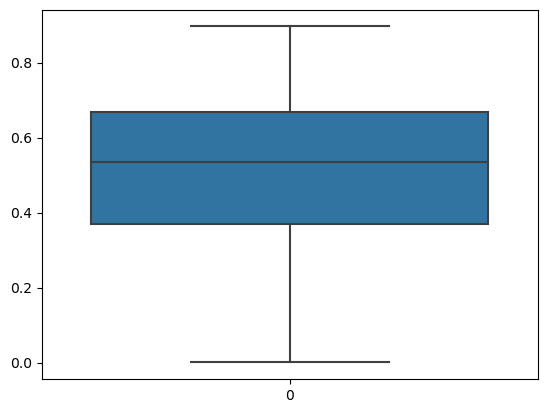

In [18]:
sns.boxplot(a.EXT_SOURCE_3)
plt.show()

In [19]:
a.EXT_SOURCE_3.fillna(a.EXT_SOURCE_3.median(),inplace=True)  #inplace used to return new dataframe

In [20]:
a.EXT_SOURCE_3.isnull()*100

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: EXT_SOURCE_3, Length: 307511, dtype: int32

In [21]:
null_cols=list(a.isna().any())
len(null_cols)


73

In [22]:
a.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [23]:
a.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [24]:
a.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [25]:
cols=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [26]:
for col in cols:
    a[col].fillna(a[col].mode()[0],inplace=True)

In [27]:
a.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [28]:
a.DAYS_BIRTH=a.DAYS_BIRTH.apply(lambda x: abs(x))
a.DAYS_EMPLOYED=a.DAYS_EMPLOYED.apply(lambda x: abs(x))
a.DAYS_ID_PUBLISH=a.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
a.DAYS_LAST_PHONE_CHANGE=a.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
a.DAYS_REGISTRATION=a.DAYS_BIRTH.apply(lambda x: abs(x))

In [29]:
null_cols=list(a.columns[a.isna().any()])
len(null_cols)

10

In [30]:
a.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [31]:
a.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [32]:
a.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [33]:
a.NAME_TYPE_SUITE.fillna(a.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [34]:
a.CNT_FAM_MEMBERS.fillna(a.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [35]:
a.EXT_SOURCE_2.fillna(a.EXT_SOURCE_2.median(),inplace=True)
a.AMT_GOODS_PRICE.fillna(a.AMT_GOODS_PRICE.median(),inplace=True)
a.AMT_ANNUITY.fillna(a.AMT_ANNUITY.median(),inplace=True)
a.DEF_60_CNT_SOCIAL_CIRCLE.fillna(a.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
a.DEF_30_CNT_SOCIAL_CIRCLE.fillna(a.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
a.OBS_30_CNT_SOCIAL_CIRCLE.fillna(a.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)


In [36]:
null_cols=list(a.columns[a.isna().any()])
null_cols

['OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']

In [37]:
a.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
28.0      0.000326
47.0      0.000326
344.0     0.000326
30.0      0.000326
26.0      0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [38]:
a.OBS_60_CNT_SOCIAL_CIRCLE.fillna(a.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [39]:
a.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.880024
1.0      15.892114
2.0       9.679654
3.0       6.573749
4.0       4.535122
5.0       3.077288
6.0       2.064642
7.0       1.412632
8.0       0.938503
9.0       0.637050
10.0      0.434131
11.0      0.272185
12.0      0.201619
13.0      0.130402
14.0      0.077396
15.0      0.053982
16.0      0.044551
17.0      0.023739
18.0      0.015934
19.0      0.014308
20.0      0.009756
21.0      0.009105
22.0      0.006504
23.0      0.004227
24.0      0.003902
25.0      0.003577
27.0      0.001626
29.0      0.000650
28.0      0.000325
47.0      0.000325
344.0     0.000325
30.0      0.000325
26.0      0.000325
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [40]:
a.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)*100

0.0       12.250659
1.0        0.914442
2.0        0.753797
3.0        0.573315
4.0        0.417873
            ...    
4051.0     0.000325
3593.0     0.000325
3622.0     0.000325
3570.0     0.000325
3538.0     0.000325
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

In [41]:
a.DAYS_LAST_PHONE_CHANGE.fillna(a.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [42]:
null_cols=list(a.columns[a.isna().any()])
len(null_cols)

0

In [43]:
a.EXT_SOURCE_2.fillna(a.EXT_SOURCE_2.median(),inplace=True)
a.AMT_GOODS_PRICE.fillna(a.AMT_GOODS_PRICE.median(),inplace=True)
a.AMT_ANNUITY.fillna(a.AMT_ANNUITY.median(),inplace=True)
a.DEF_60_CNT_SOCIAL_CIRCLE.fillna(a.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
a.DEF_30_CNT_SOCIAL_CIRCLE.fillna(a.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
a.OBS_30_CNT_SOCIAL_CIRCLE.fillna(a.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)


In [44]:
a["YEARS_BIRTH"]=a.DAYS_BIRTH.apply(lambda x: int(x//356))
a["YEARS_EMPLOYED"]=a.DAYS_EMPLOYED.apply(lambda x: int(x//356))
a["YEARS_REGISTRATION"]=a.DAYS_REGISTRATION.apply(lambda x: int(x//356))
a["YEARS_ID_PUBLISH"]=a.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
a["YEARS_LAST_PHONE_CHANGE"]=a.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))


In [45]:
a.AMT_CREDIT.value_counts(normalize=True)*100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [46]:
a.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [47]:
a["AMT_CREDIT_Category"]=pd.cut(a.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                 labels=["Very low credit","Low credit","Medium credit","High credit","Very high credit"])

In [48]:
a.AMT_CREDIT_Category.value_counts(normalize=True)*100

Low credit          31.511770
Medium credit       25.733324
High credit         16.791314
Very low credit     14.035088
Very high credit    11.928504
Name: AMT_CREDIT_Category, dtype: float64

<Axes: >

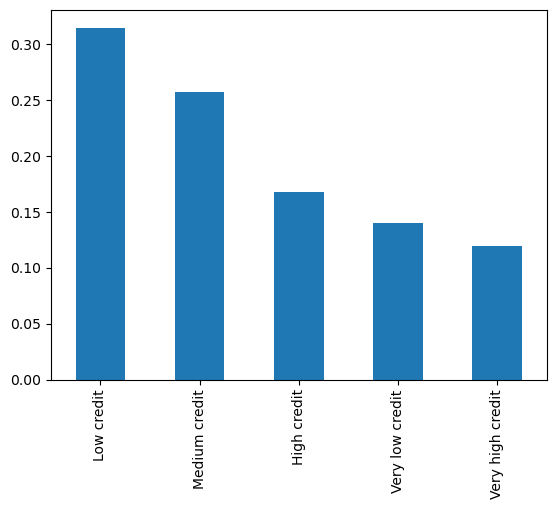

In [49]:
a["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()

In [50]:
#binning years birth col
a["AGE_Category"]=pd.cut(a.YEARS_BIRTH,[0,25,45,65,85],
                        labels=["Below 25","25-45","45-65","65-85"])

In [51]:
a.AGE_Category.value_counts(normalize=True)*100

25-45       50.094143
45-65       41.772489
Below 25     4.426834
65-85        3.706534
Name: AGE_Category, dtype: float64

<Axes: ylabel='AGE_Category'>

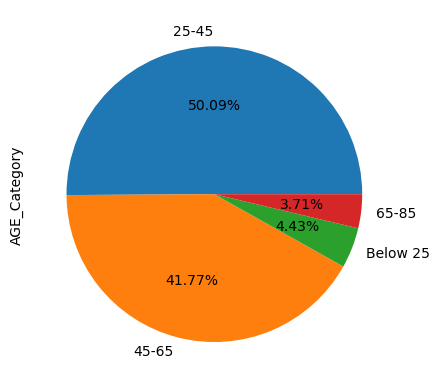

In [52]:
a["AGE_Category"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

In [53]:
a.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               9461   
1                    0.003541       16765           1188              16765   
2                    0.010032       19046            225              19046   
3                    0.008019       19005           3039              19005   
4                    0.028663       19932           3038              19932   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   
3                 1           0           0        Laborers             2.0   
4                 1           0           0      Core staff             1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                   

In [54]:
t0=a[a.TARGET==0]
t1=a[a.TARGET==1]

In [55]:
a.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [56]:
cat_cols=list(a.columns[a.dtypes==object])
num_cols=list(a.columns[a.dtypes==np.int64])+list(a.columns[a.dtypes==np.float64])

In [57]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [58]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary              

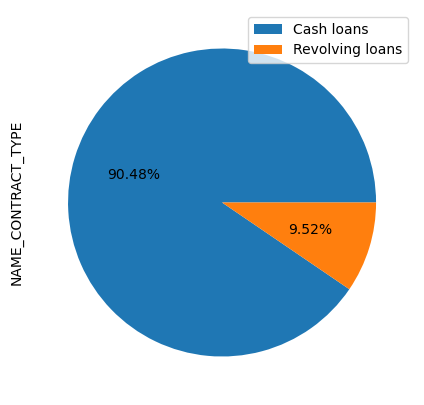

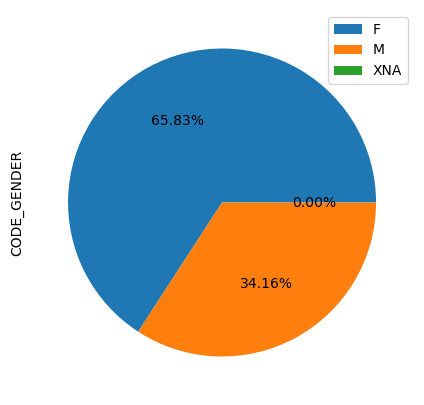

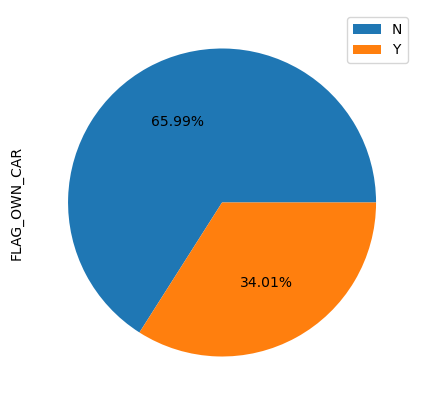

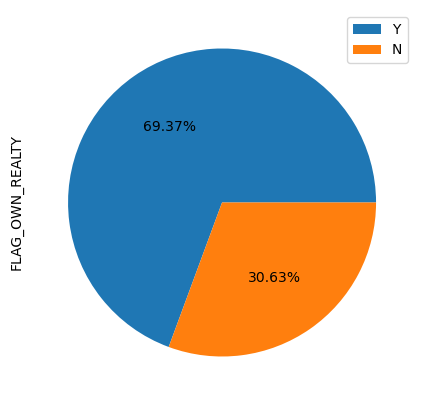

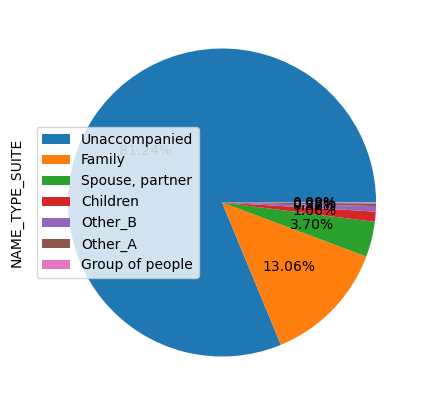

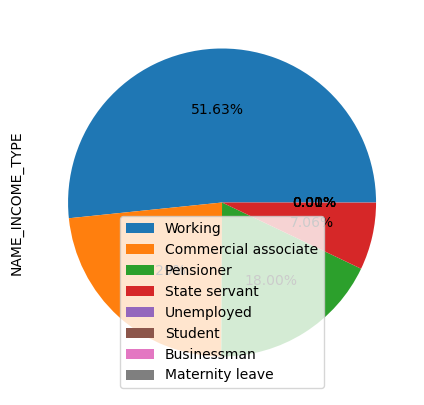

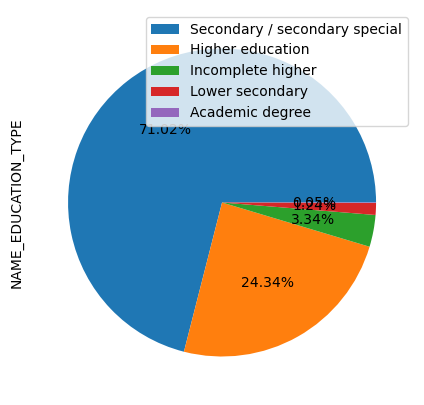

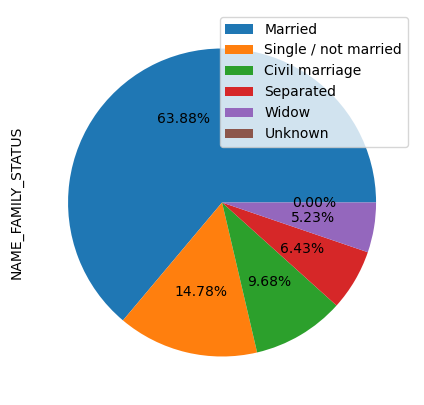

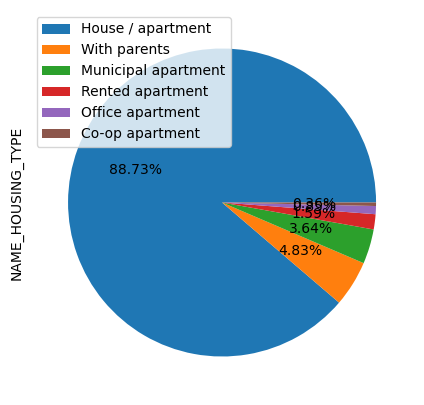

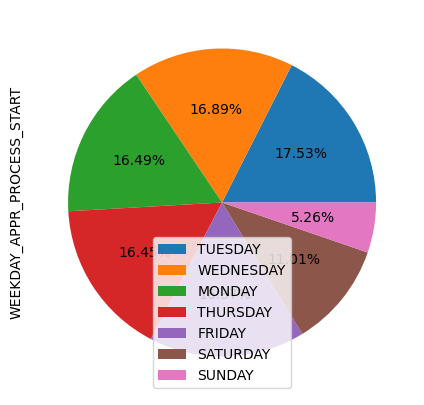

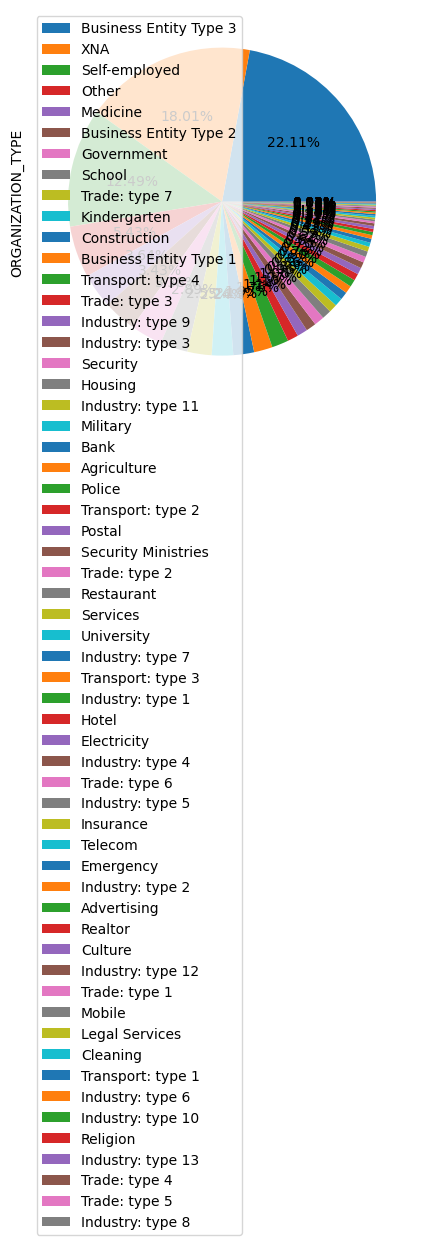

In [59]:
for col in cat_cols:
    print(a[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    a[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
    plt.legend()
    

In [60]:
num_cols_withoutflag=[]
num_cols_withflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)
        

In [61]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [62]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
_________________
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
_________________
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
_________________
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
_________________
count    307511.000000
mean      67724.742149
std      139443.

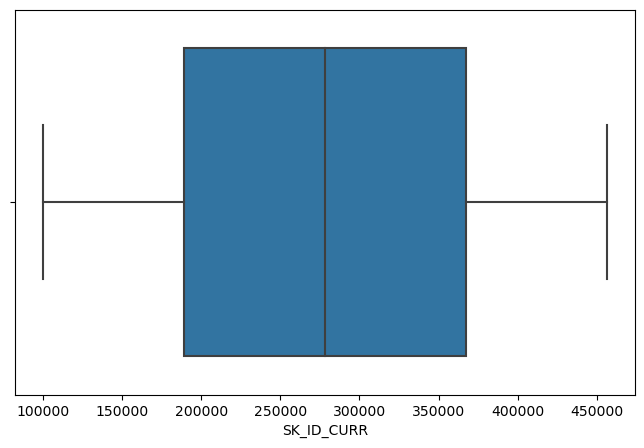

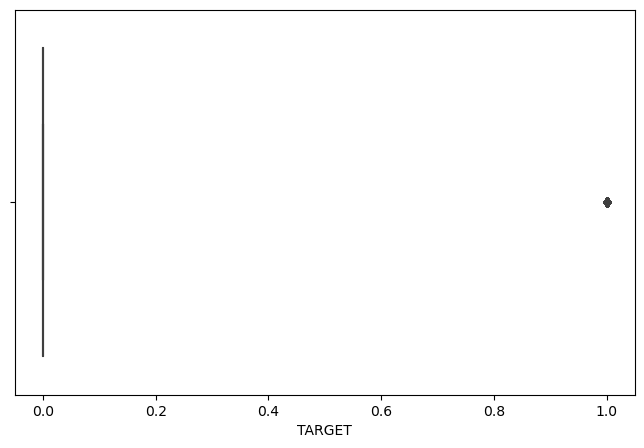

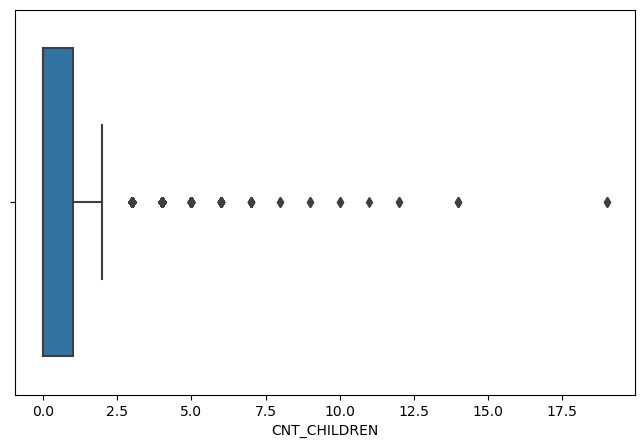

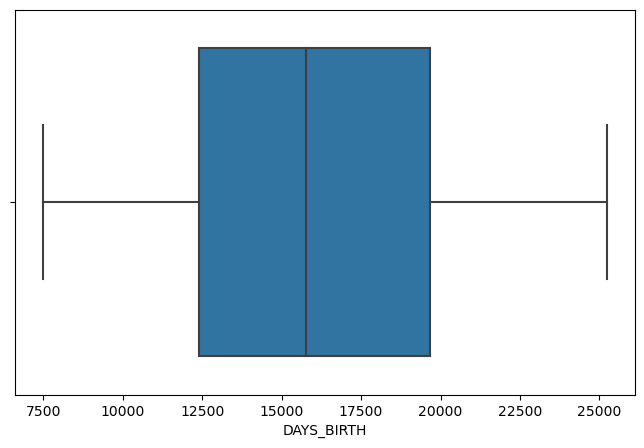

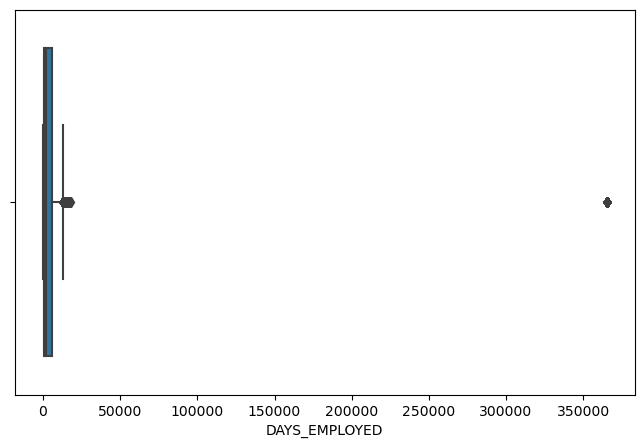

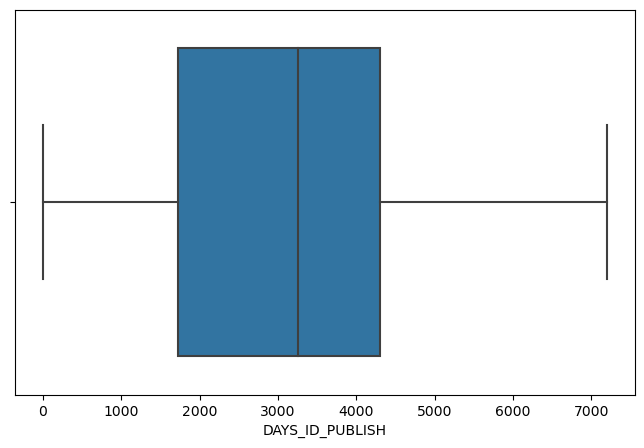

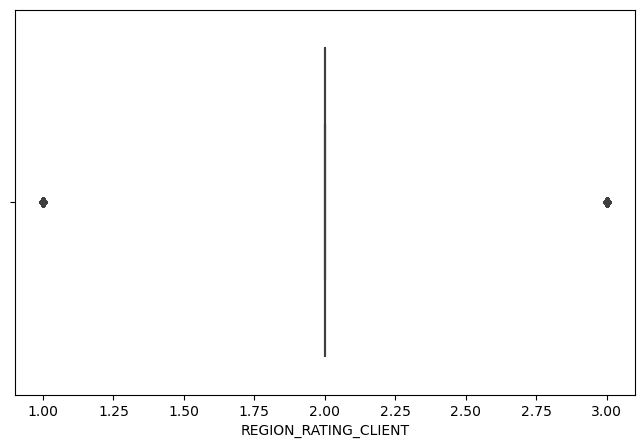

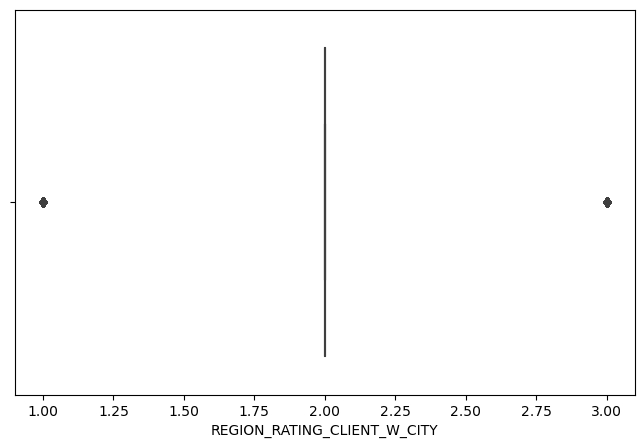

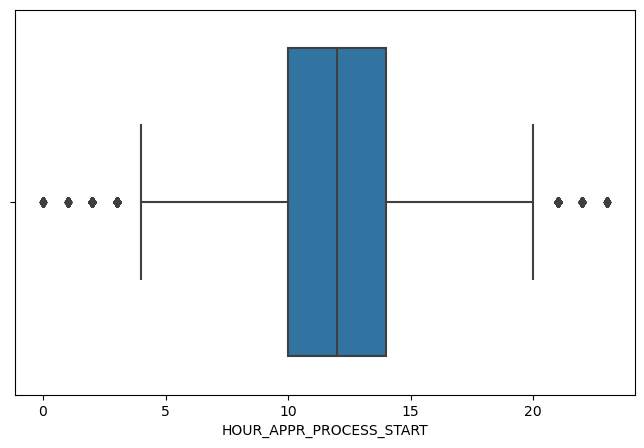

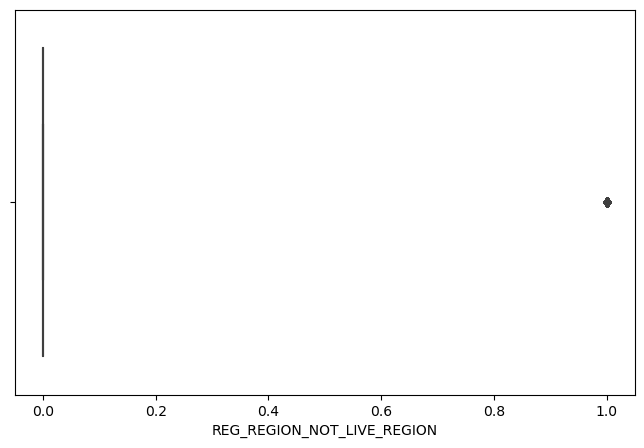

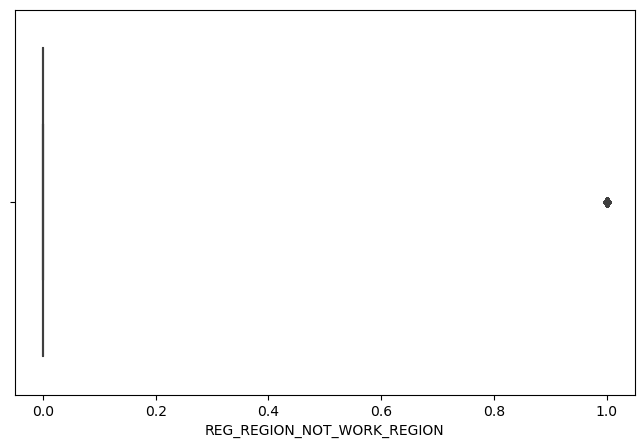

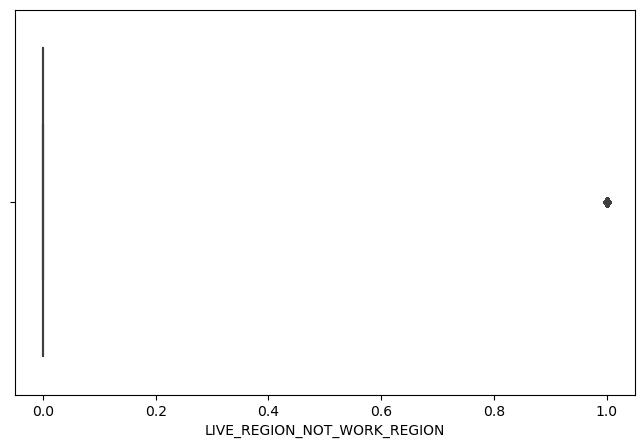

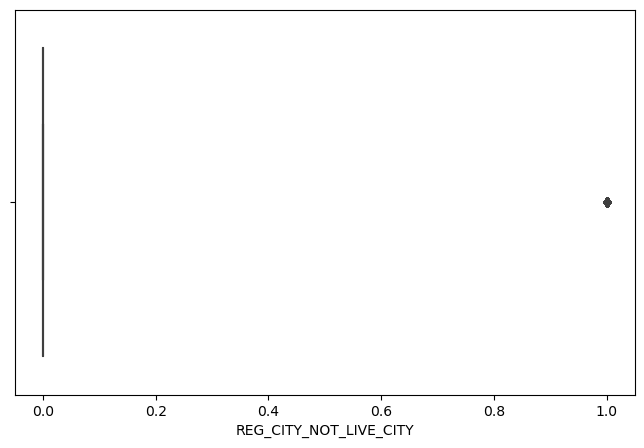

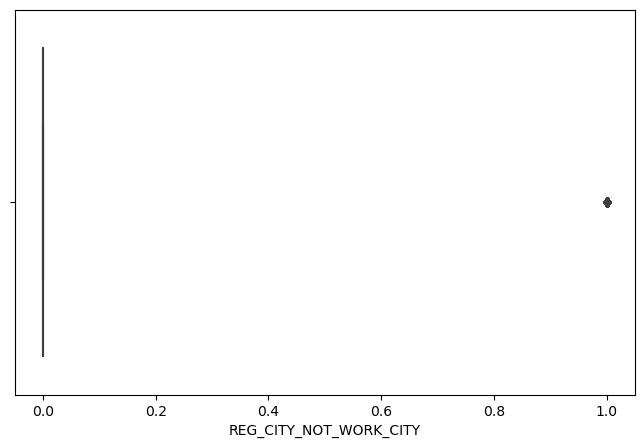

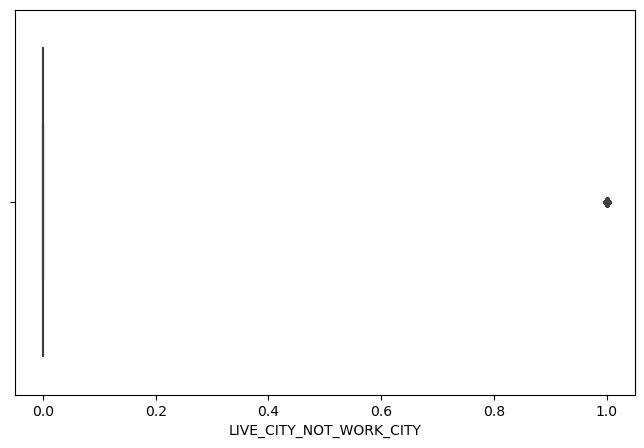

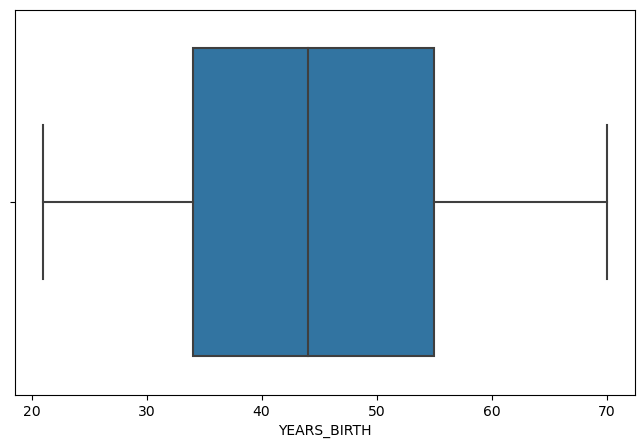

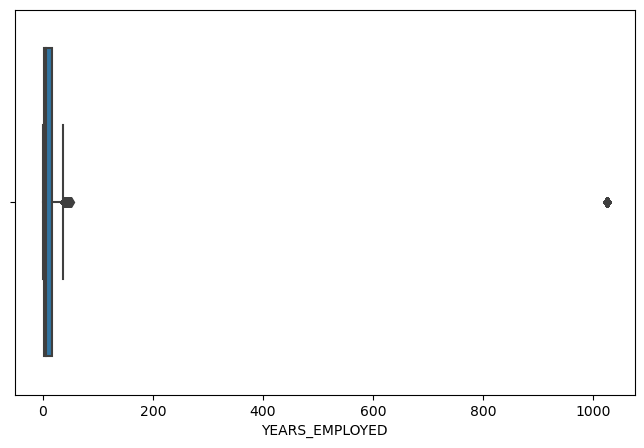

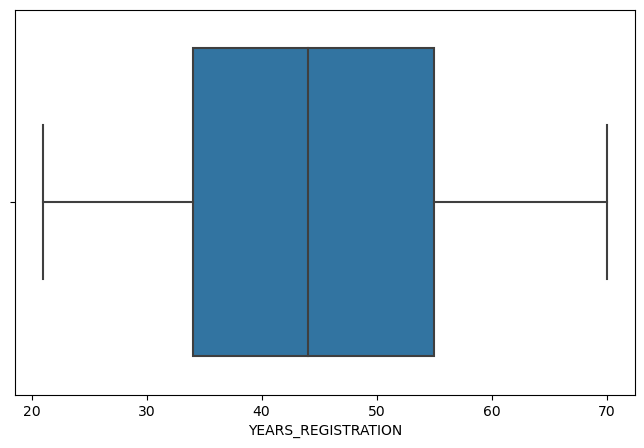

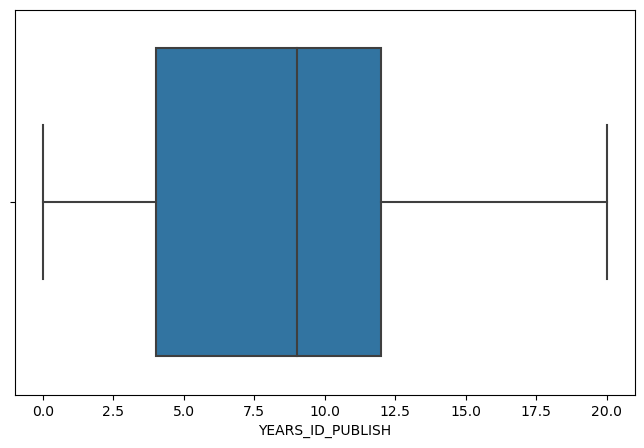

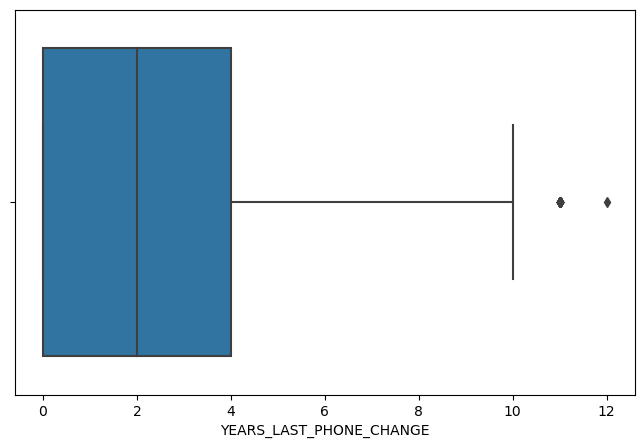

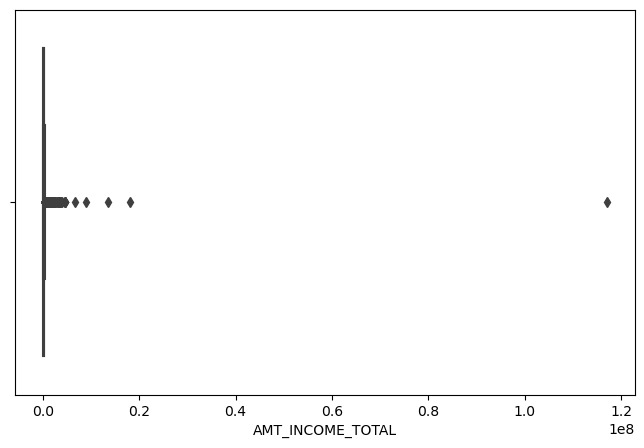

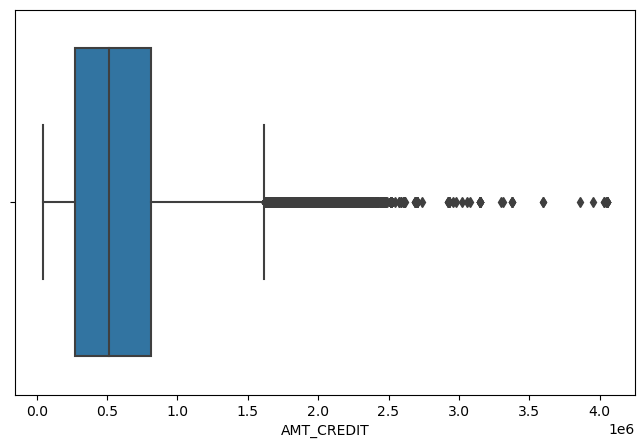

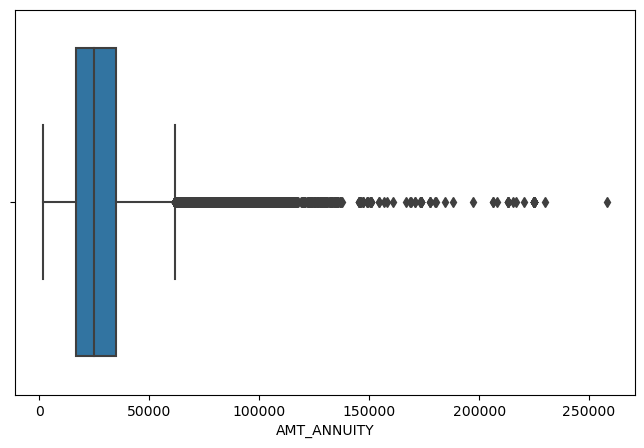

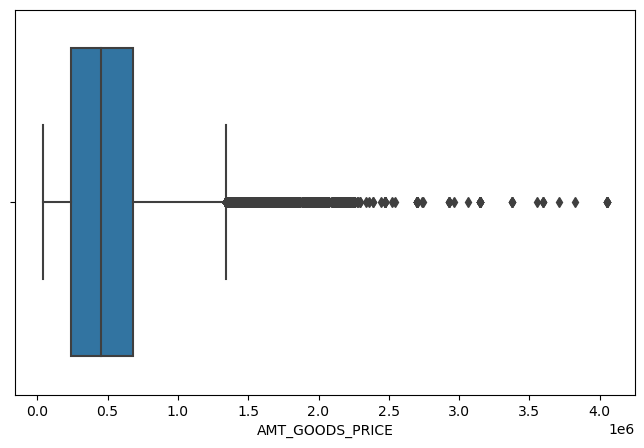

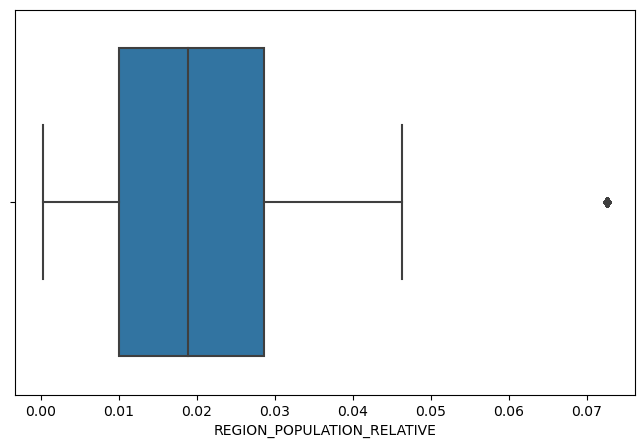

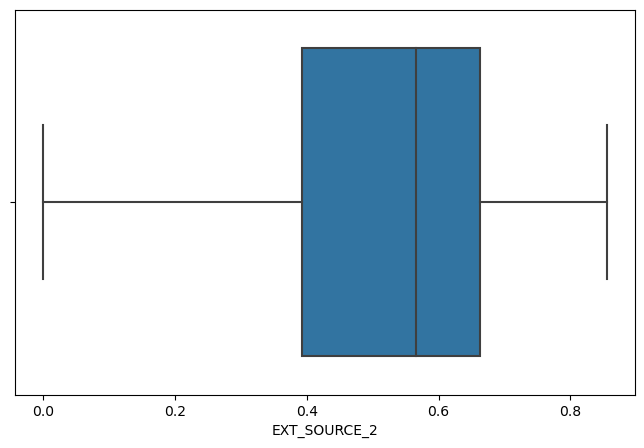

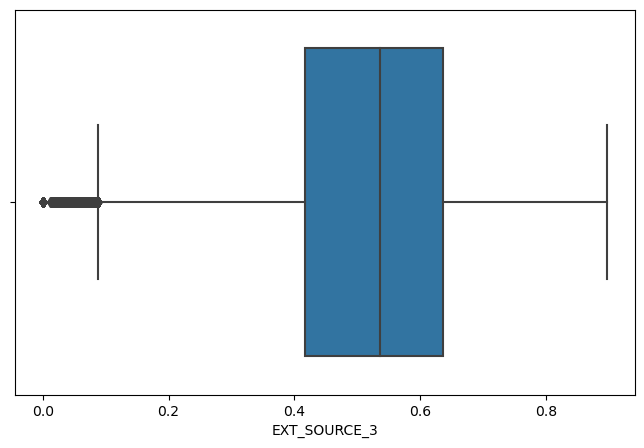

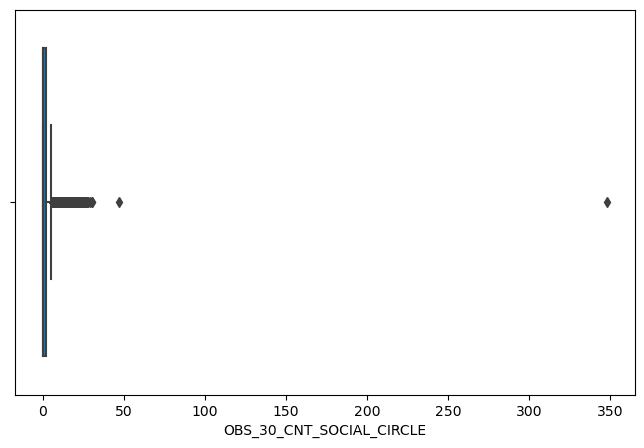

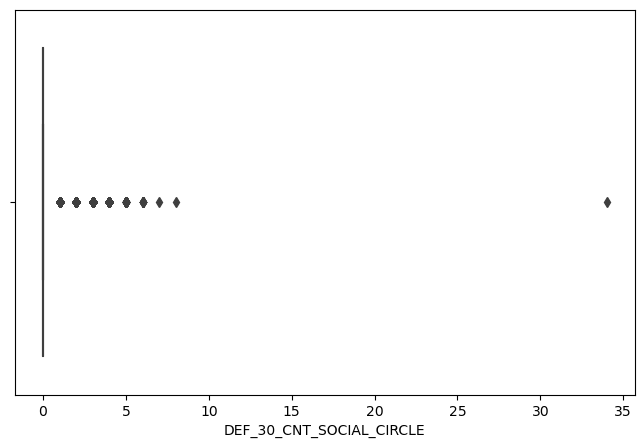

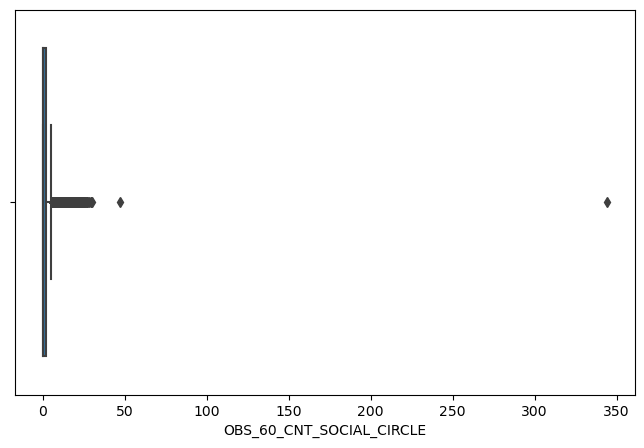

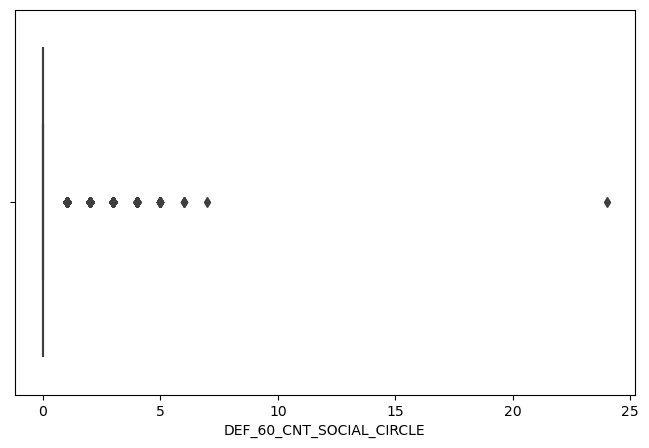

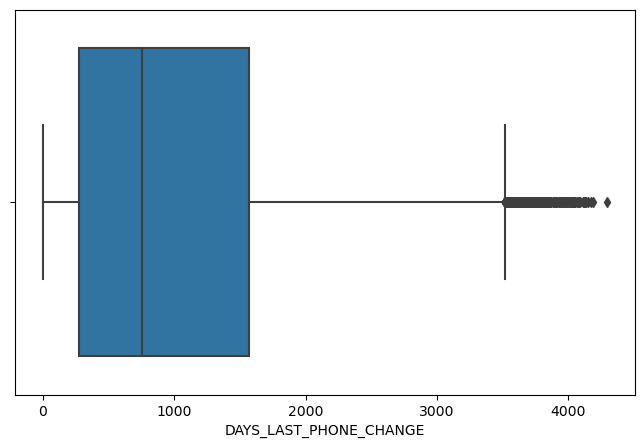

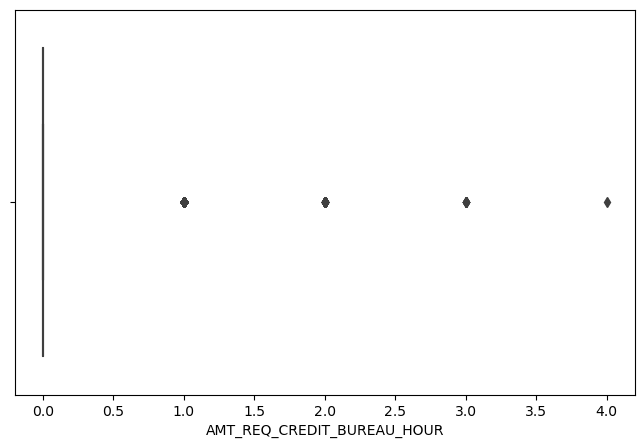

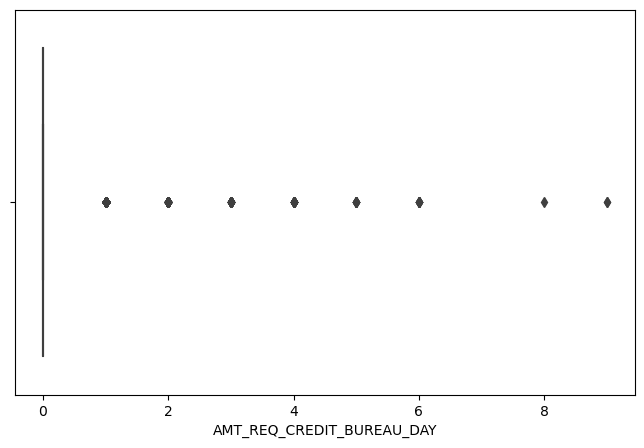

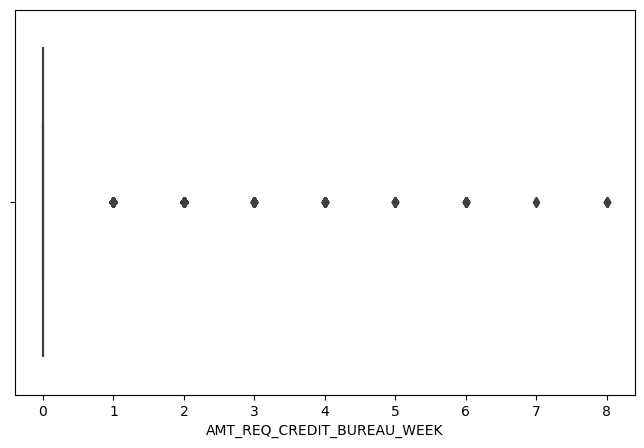

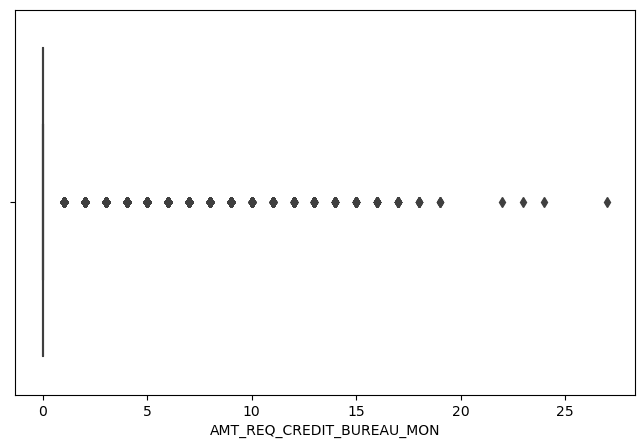

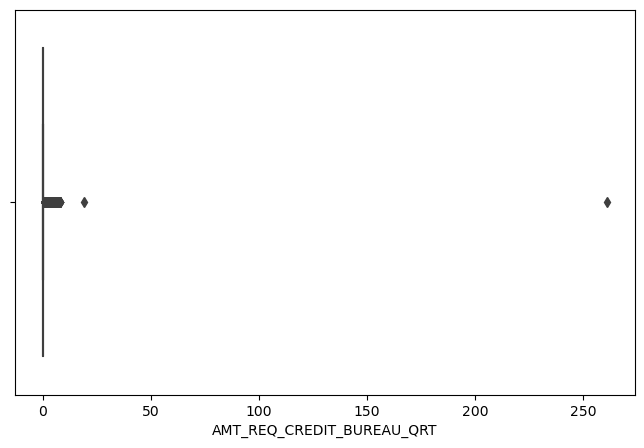

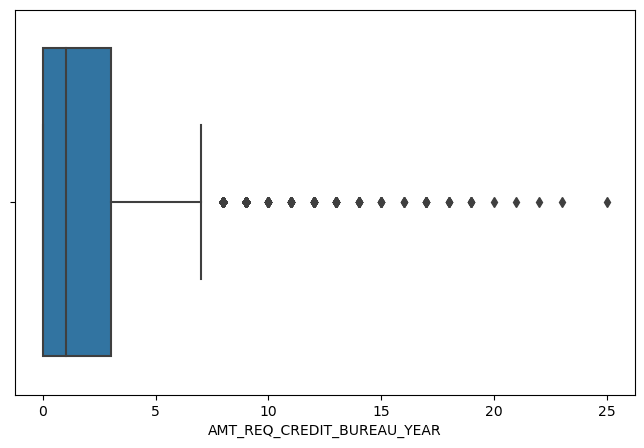

In [63]:
for col in num_cols_withoutflag:
    print(a[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=a,x=col)
    print("_________________")

ploton NAME_CONTRACT_TYPE for Taget 0 and 1


__________________________________
ploton CODE_GENDER for Taget 0 and 1


__________________________________
ploton FLAG_OWN_CAR for Taget 0 and 1


__________________________________
ploton FLAG_OWN_REALTY for Taget 0 and 1


__________________________________
ploton NAME_TYPE_SUITE for Taget 0 and 1


__________________________________
ploton NAME_INCOME_TYPE for Taget 0 and 1


__________________________________
ploton NAME_EDUCATION_TYPE for Taget 0 and 1


__________________________________
ploton NAME_FAMILY_STATUS for Taget 0 and 1


__________________________________
ploton NAME_HOUSING_TYPE for Taget 0 and 1


__________________________________
ploton OCCUPATION_TYPE for Taget 0 and 1


__________________________________
ploton CNT_FAM_MEMBERS for Taget 0 and 1


__________________________________
ploton WEEKDAY_APPR_PROCESS_START for Taget 0 and 1


__________________________________
ploton ORGANIZATION_TYPE for Taget 0 and 1


__

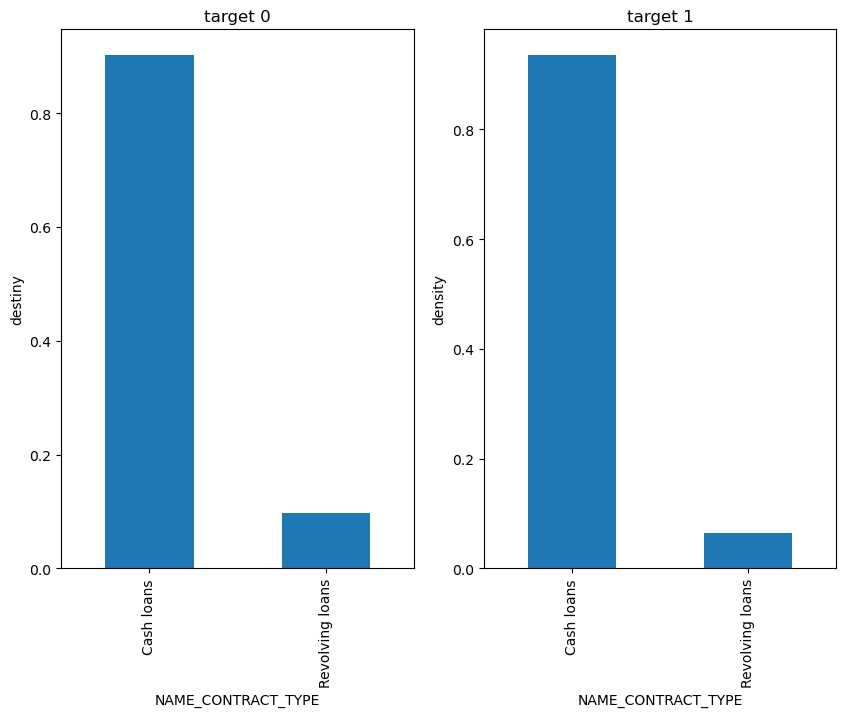

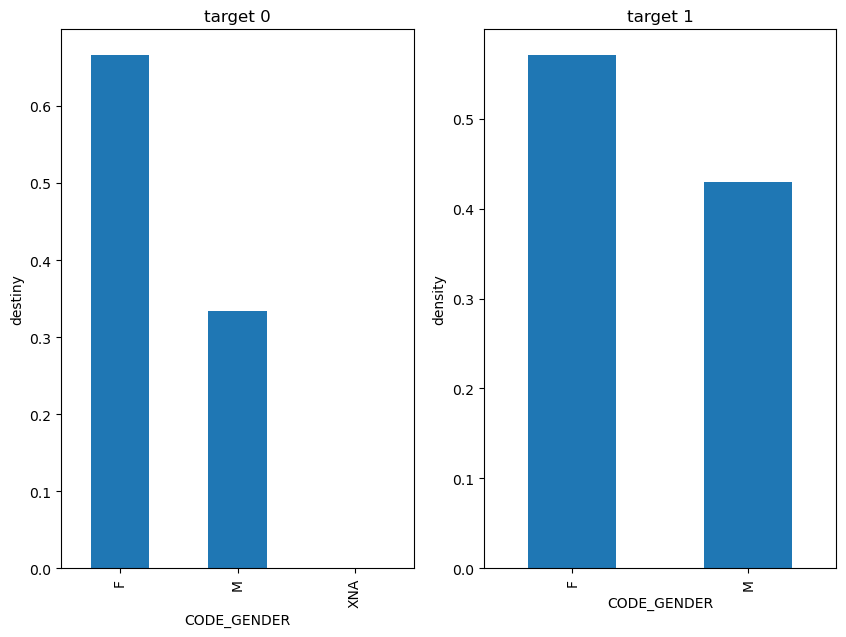

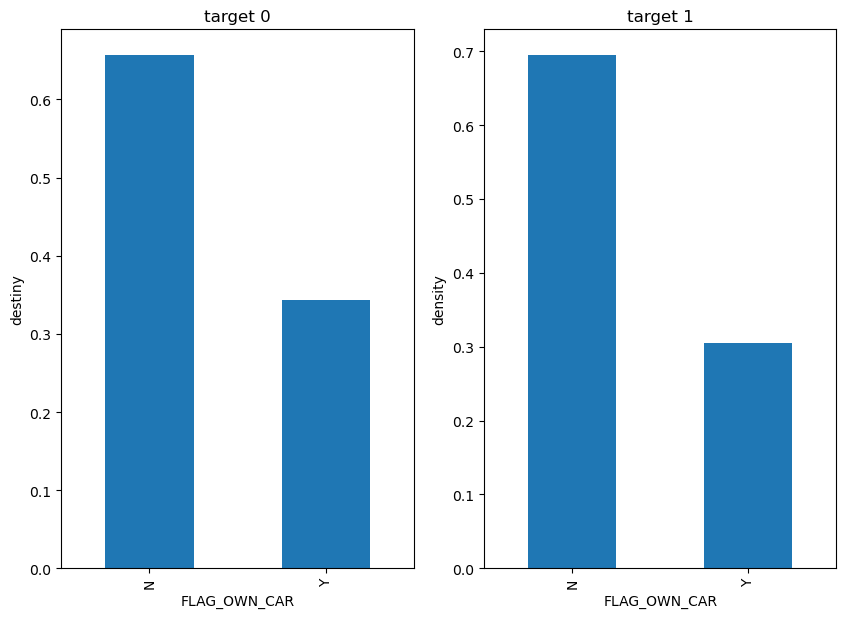

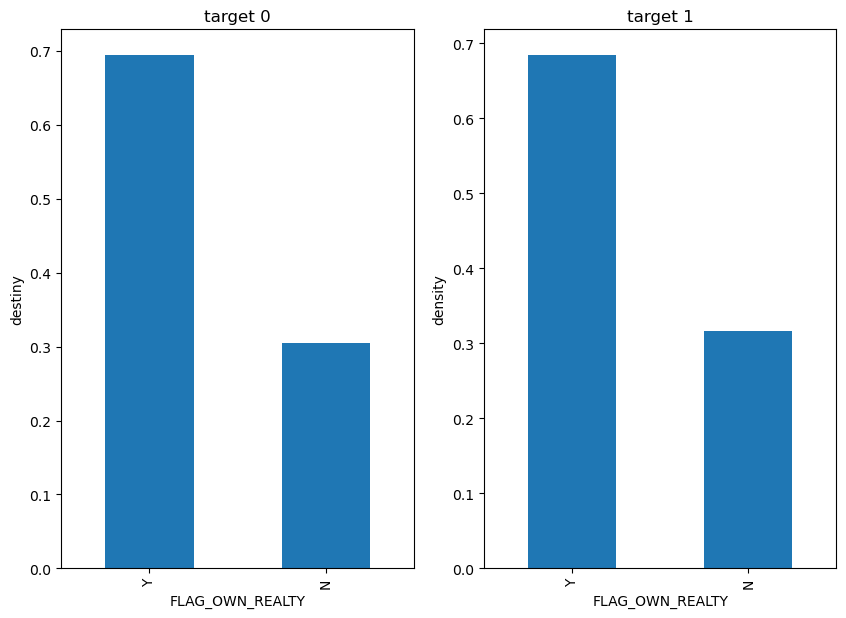

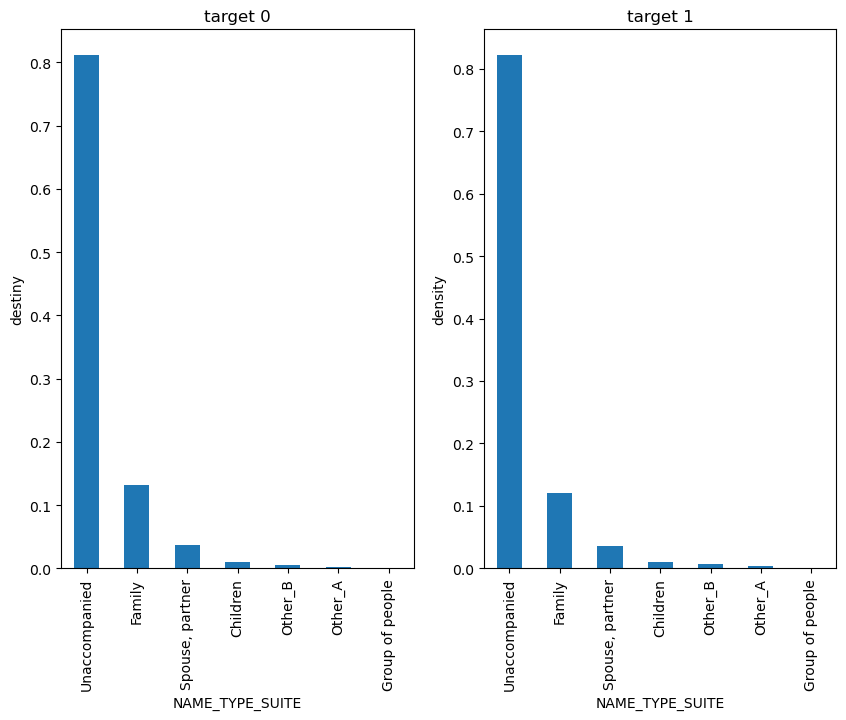

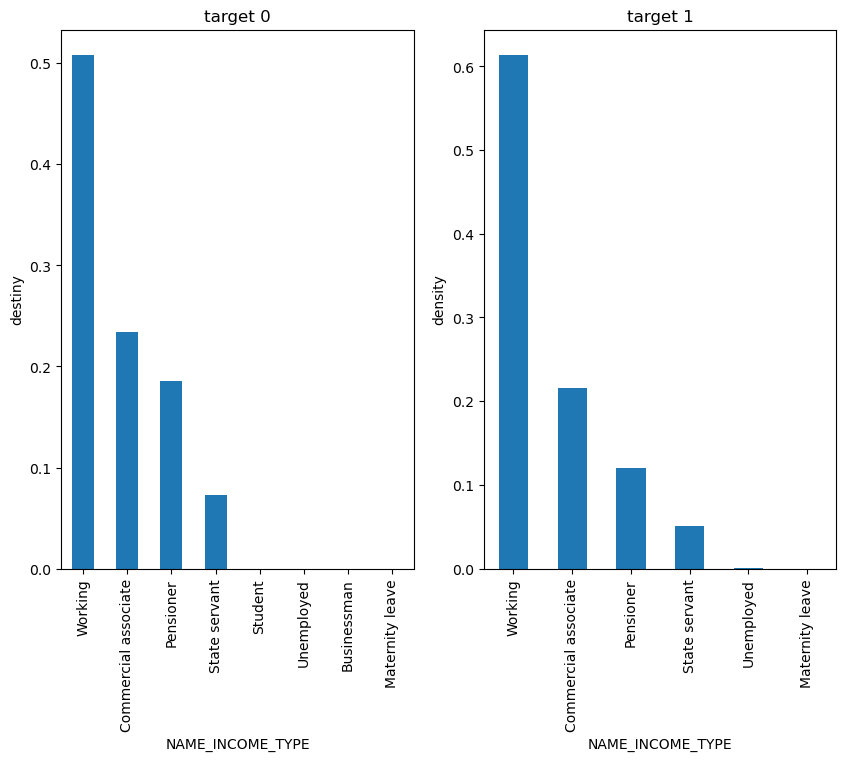

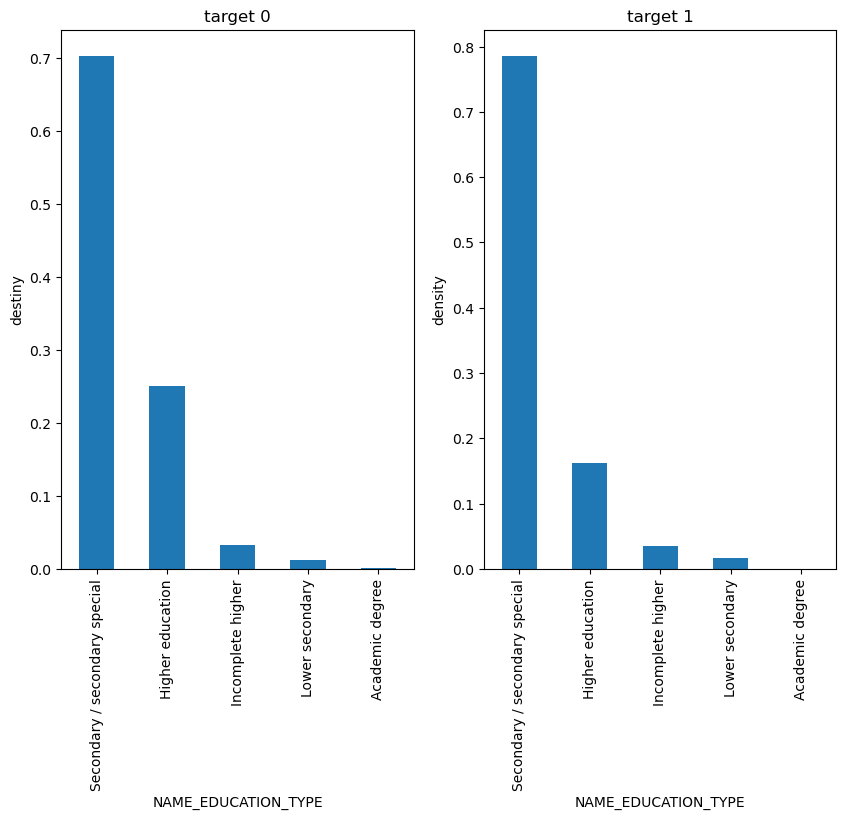

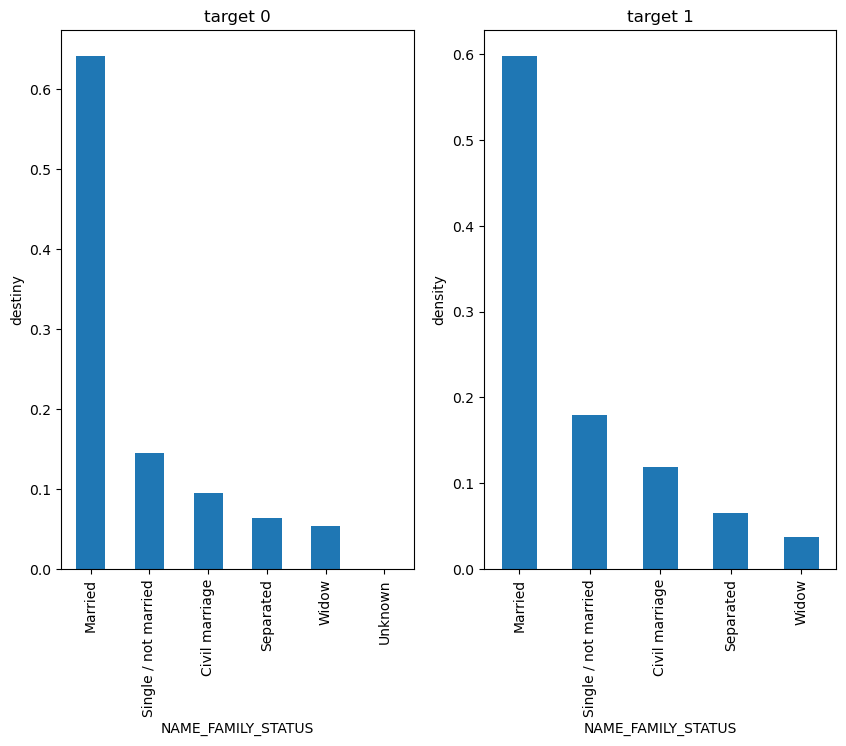

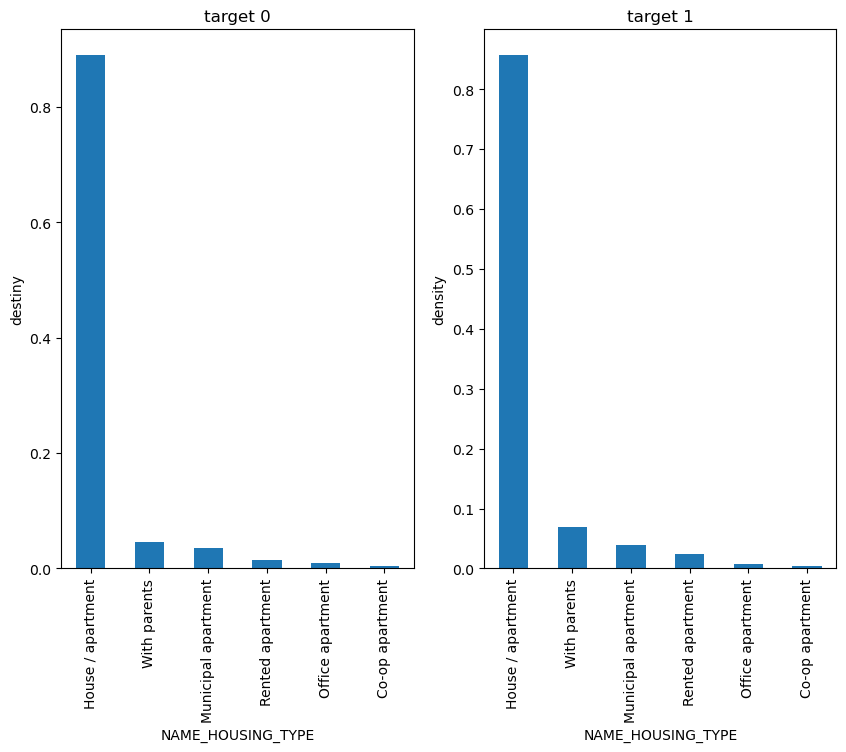

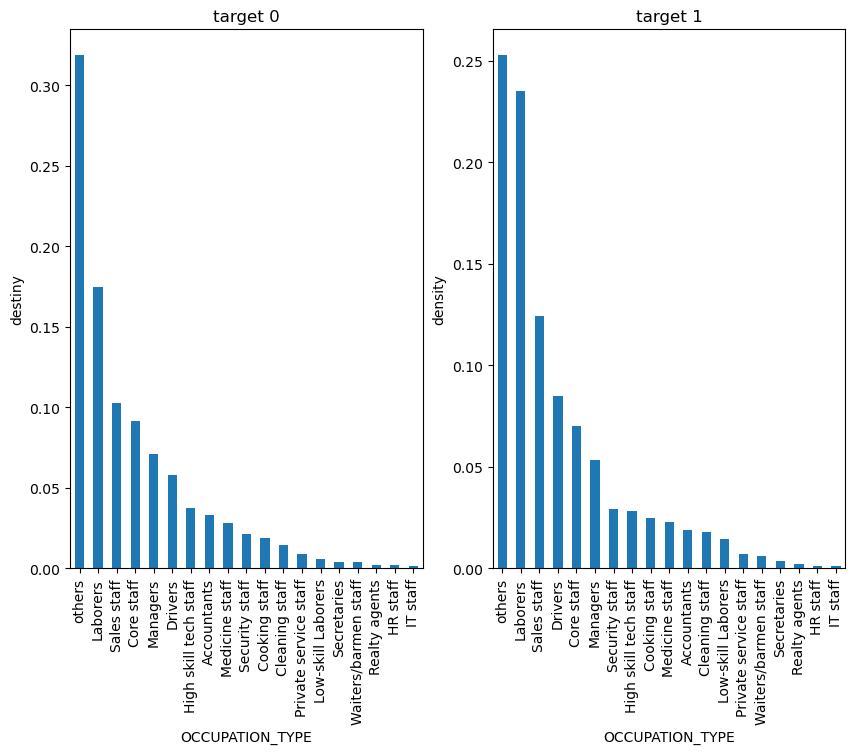

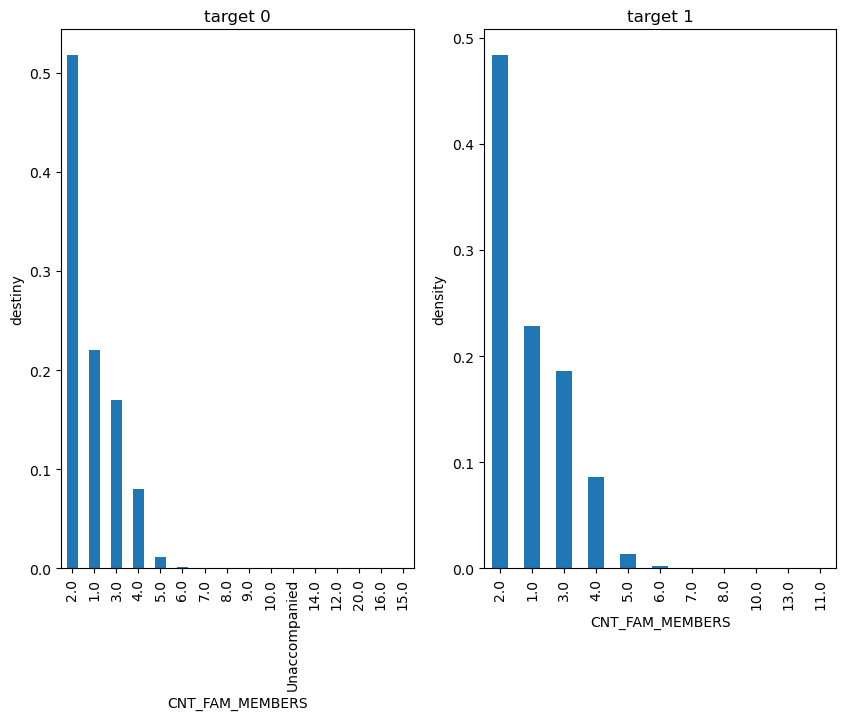

In [64]:
for  col in cat_cols:
    print(f"ploton {col} for Taget 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    t0[col].value_counts(normalize=True).plot.bar()
    plt.title("target 0")
    plt.xlabel(col)
    plt.ylabel("destiny")
    plt.subplot(1,2,2)
    t1[col].value_counts(normalize=True).plot.bar()
    plt.title("target 1")
    plt.xlabel(col)
    plt.ylabel("density")
    print("\n\n__________________________________")

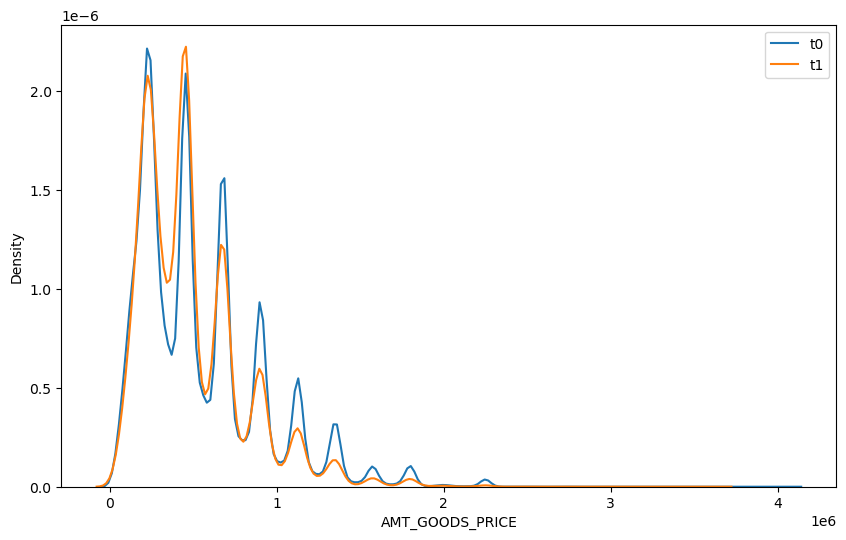

In [65]:
plt.figure(figsize=[10,6])
sns.distplot(t0['AMT_GOODS_PRICE'],label='t0',hist=False)
sns.distplot(t1['AMT_GOODS_PRICE'],label='t1',hist=False)
plt.legend()

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='HOUR_APPR_PROCESS_START'>

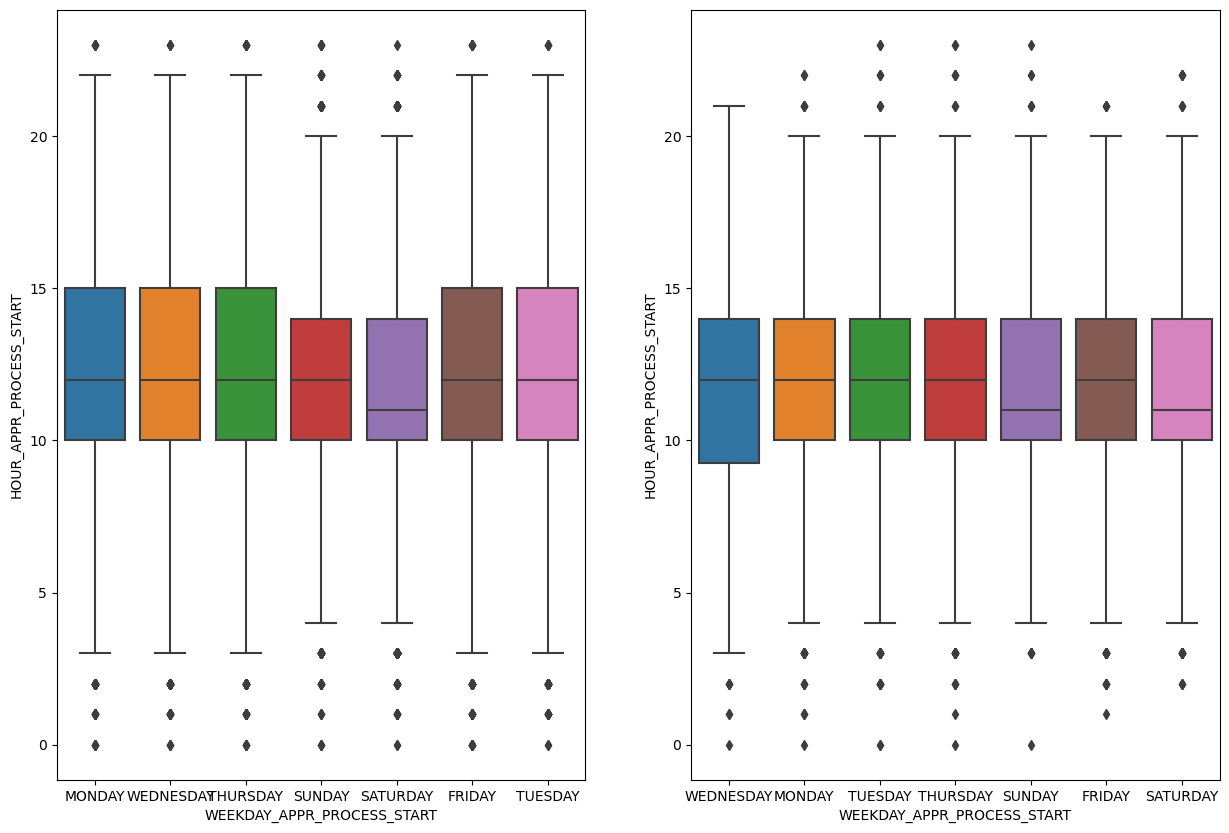

In [66]:
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=t0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=t1)


<Axes: xlabel='AGE_Category', ylabel='AMT_CREDIT'>

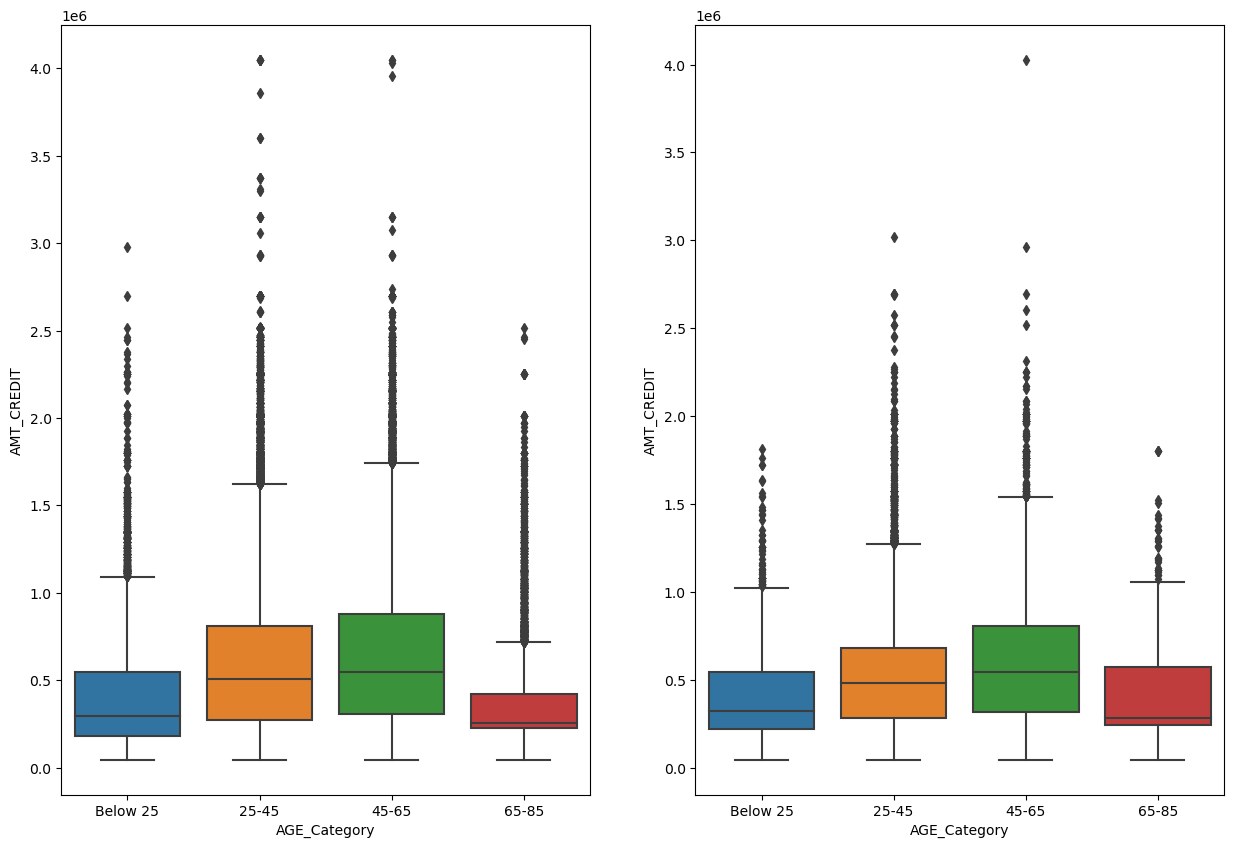

In [67]:
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category',y='AMT_CREDIT',data=t0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category',y='AMT_CREDIT',data=t1)


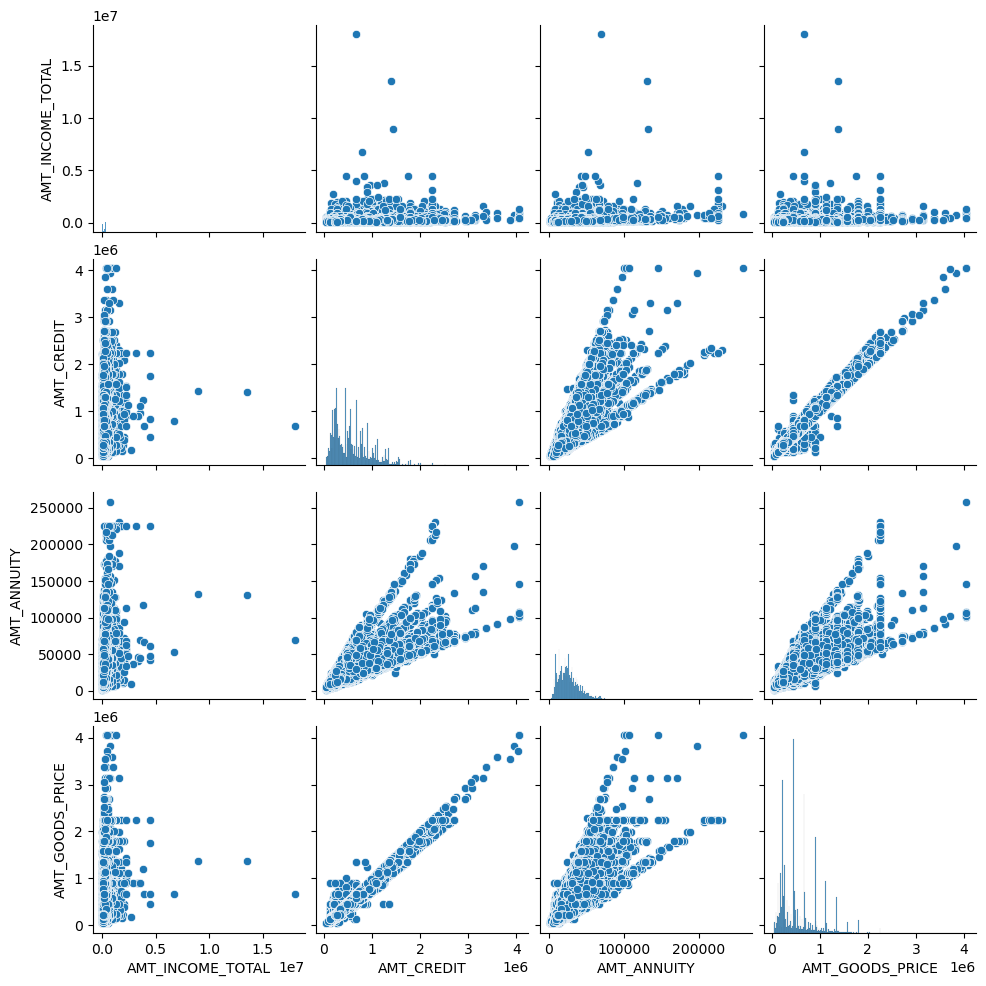

In [68]:
sns.pairplot(t0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])


In [69]:
corr_data=a[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]

In [70]:
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_EMPLOYED  \
0          202500.0    406597.5      24700.5         351000.0               1   
1          270000.0   1293502.5      35698.5        1129500.0               3   
2           67500.0    135000.0       6750.0         135000.0               0   
3          135000.0    312682.5      29686.5         297000.0               8   
4          121500.0    513000.0      21865.5         513000.0               8   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
0                  26                 5                        3  
1                  47                 0                        2  
2                  53                 7                        2  
3                  53                 6                        1  
4                  55                 9                        3

In [71]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_EMPLOYED                  -0.063837   -0.064321    -0.102849   
YEARS_REGISTRATION              -0.027239    0.055373    -0.009519   
YEARS_ID_PUBLISH                -0.008459    0.006942    -0.011376   
YEARS_LAST_PHONE_CHANGE          0.018571    0.077257     0.064494   

                         AMT_GOODS_PRICE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
AMT_INCOME_TOTAL                0.159632       -0.063837           -0.027239   
AMT_CREDIT                      0.986734       -0.064321            0.055373   
AMT_ANNUITY                     0.774837       -0.102849           -0.009519   
AMT_GOODS_PRICE                 1.000000       -0.062193            0.053449   
YEARS_EMPLOYED                 -0.062193        1.000000            0.623745   
YEARS_REGISTRATION              0.053449        0.623745            1.000000   
YEARS_ID_PUBLISH                0.009647        0.274644            0.272054   
YEARS_LAST_PHONE_CHANGE         0.079349       -0.016424            0.086317   

                         YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                -0.008459                 0.018571  
AMT_CREDIT                       0.006942                 0.077257  
AMT_ANNUITY                     -0.011376                 0.064494  
AMT_GOODS_PRICE                  0.009647                 0.079349  
YEARS_EMPLOYED                   0.274644                -0.016424  
YEARS_REGISTRATION               0.272054                 0.086317  
YEARS_ID_PUBLISH                 1.000000                 0.092803  
YEARS_LAST_PHONE_CHANGE          0.092803                 1.000000

<Axes: >

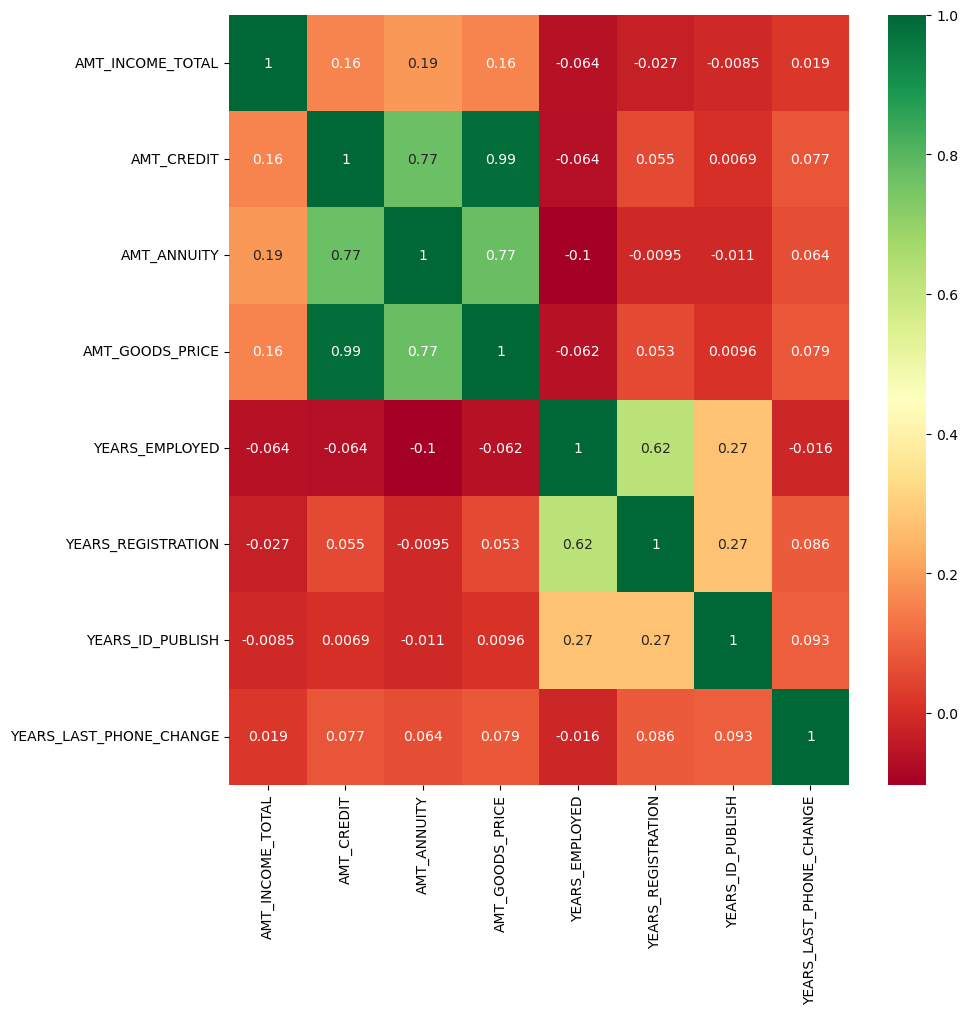

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")

In [73]:
corr_data_0=t0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_EMPLOYED  \
1          270000.0   1293502.5      35698.5        1129500.0               3   
2           67500.0    135000.0       6750.0         135000.0               0   
3          135000.0    312682.5      29686.5         297000.0               8   
4          121500.0    513000.0      21865.5         513000.0               8   
5           99000.0    490495.5      27517.5         454500.0               4   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
1                  47                 0                        2  
2                  53                 7                        2  
3                  53                 6                        1  
4                  55                 9                        3  
5                  47                 1                        7

In [74]:
corr_data_1=t1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                  26                 5   
26               7                  52                 5   
40               3                  49                 2   
42              10                  37                12   
81            1025                  69                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        3  
42                        4  
81                        0

<Axes: >

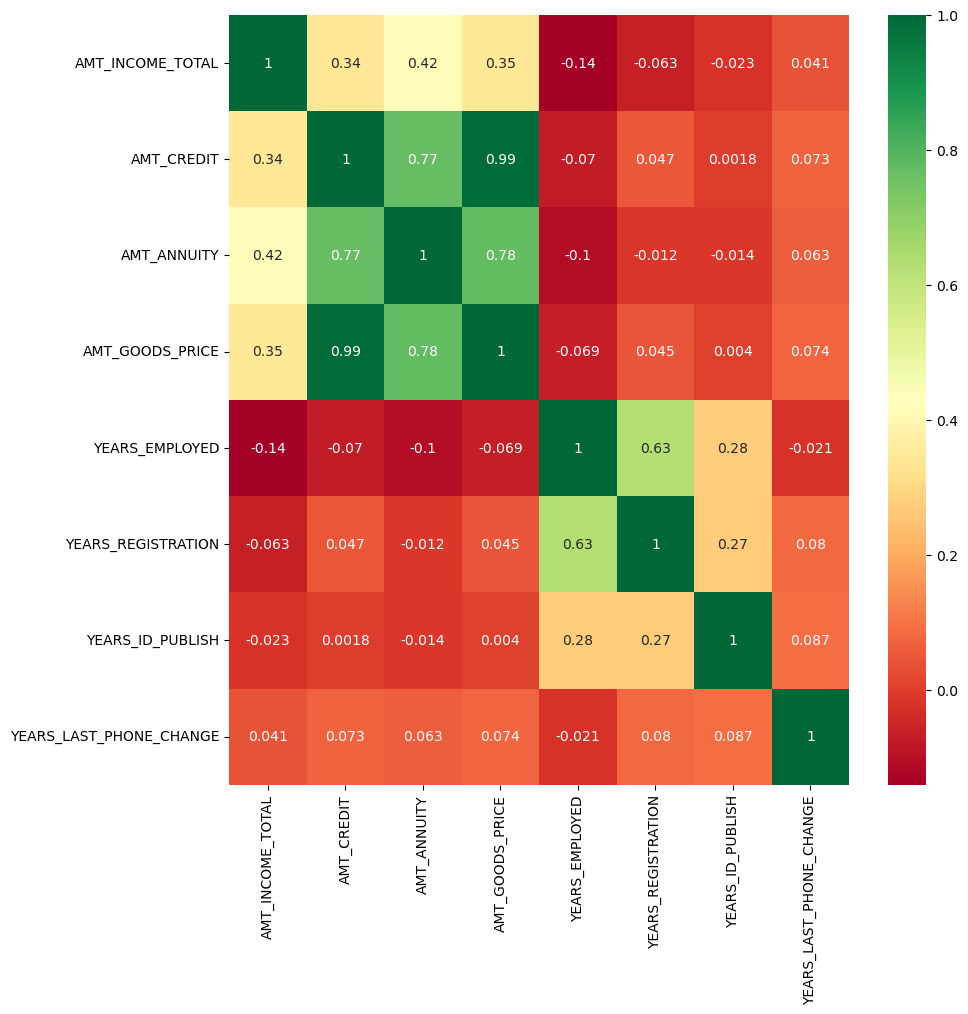

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True,cmap="RdYlGn")

<Axes: >

In [125]:
p=pd.read_csv('previous_application.csv')
p.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [126]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
p.shape

(1670214, 37)

In [80]:
p.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [81]:
#quality check
percentage=50
threshold_p=int(((100-percentage)/100)*p.shape[0]+1)
p=p.dropna(axis=1,thresh=threshold_p)
p.head() 

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

In [82]:
for col in p.columns:
    if p[col].dtypes==np.int64 or p[col].dtypes==np.float64:
        p[col]=p[col].apply(lambda x: abs(x))
        

In [83]:
null_cols=list(p.columns[p.isna().any()])
len(null_cols)

12

In [84]:
p.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [85]:
p.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [86]:
p["AMT_CREDIT_Category"]=pd.cut(p.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],
                                 labels=["Very low credit","Low credit","Medium credit","High credit","Very high credit"])

In [97]:
p["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()

<Axes: >

In [112]:
a.AMT_GOODS_PRICE.value_counts(normalize=True)*100

450000.0     8.552540
225000.0     8.221495
675000.0     8.117433
900000.0     5.013154
270000.0     3.716290
               ...   
1265751.0    0.000325
503266.5     0.000325
810778.5     0.000325
666090.0     0.000325
743863.5     0.000325
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [122]:
p["AMT_GOODS_PRICE_Category"]=pd.cut(p.AMT_GOODS_PRICE_Category,[0,0.25,0.45,0.65,0.85,1],
                                 labels=["Very low credit","Low credit","Medium credit","High credit","Very high credit"])

In [148]:
approved=p[p.NAME_CONTRACT_STATUS=="Approved"]
cancelled=p[p.NAME_CONTRACT_STATUS=="Canceled"]
refused=p[p.NAME_CONTRACT_STATUS=="Refused"]
unused=p[p.NAME_CONTRACT_STATUS=="Unused offer"]

In [149]:
p.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

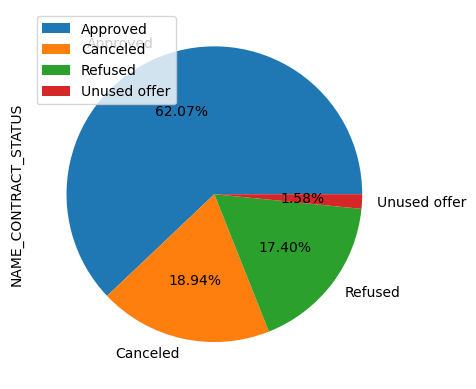

In [150]:
p.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

In [151]:
# univariant analysis
cat_cols1=list(p.columns[p.dtypes==object])
num_cols1=list(p.columns[p.dtypes==np.int64])+list(p.columns[p.dtypes==np.float64])

In [152]:
cat_cols1

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [153]:
num_cols1

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [154]:
cat_cols1=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

In [155]:
num_cols1=["HOUR_APPR_PROCESS_START","DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


_____________
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


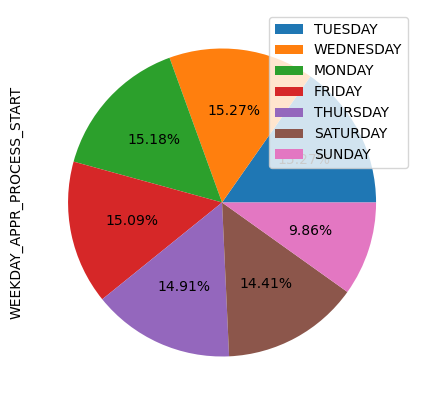

_____________
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


_____________
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


_____________
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


_____________
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64


_____________
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64


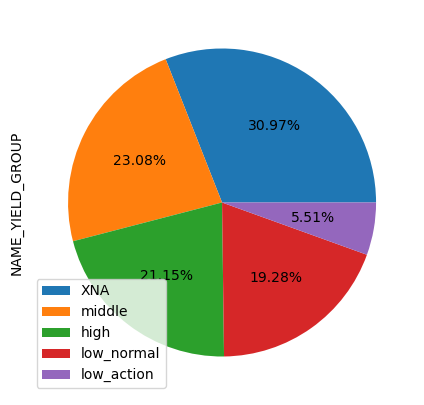

_____________
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64


_____________


In [156]:
for col in cat_cols1:
    print(p[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    p[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()
    print('_____________')

99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


______________
99th percentile -14.0
count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64


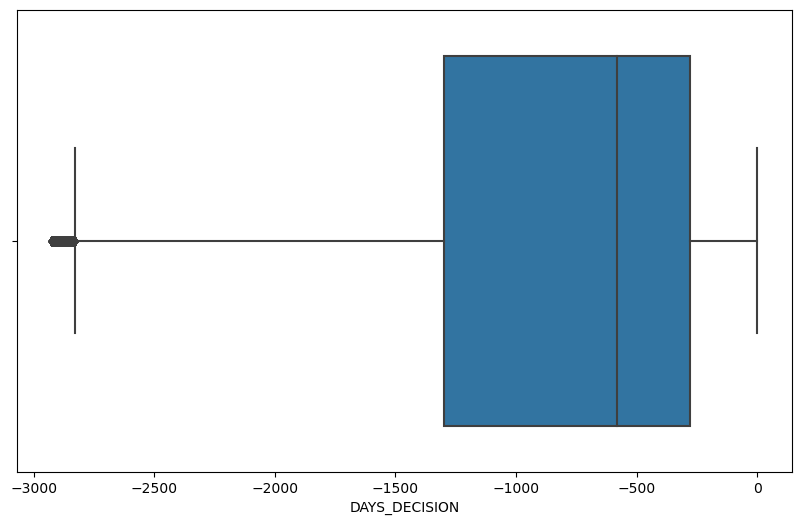

______________
99th percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


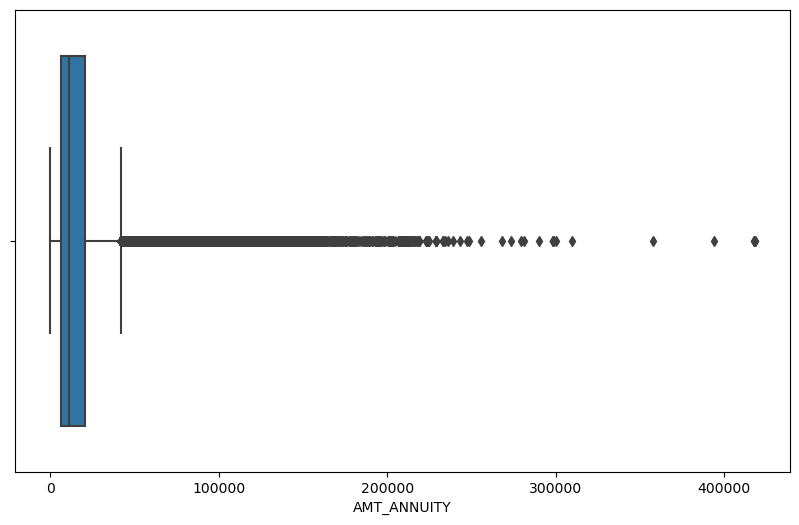

______________
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


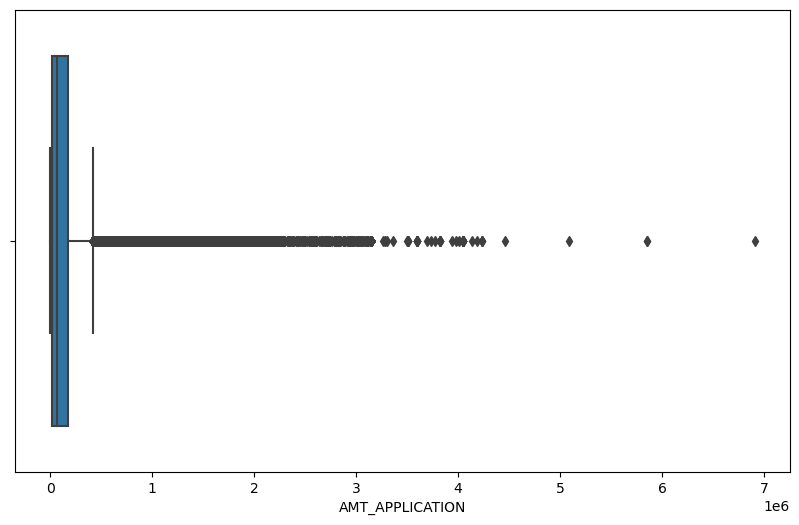

______________
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


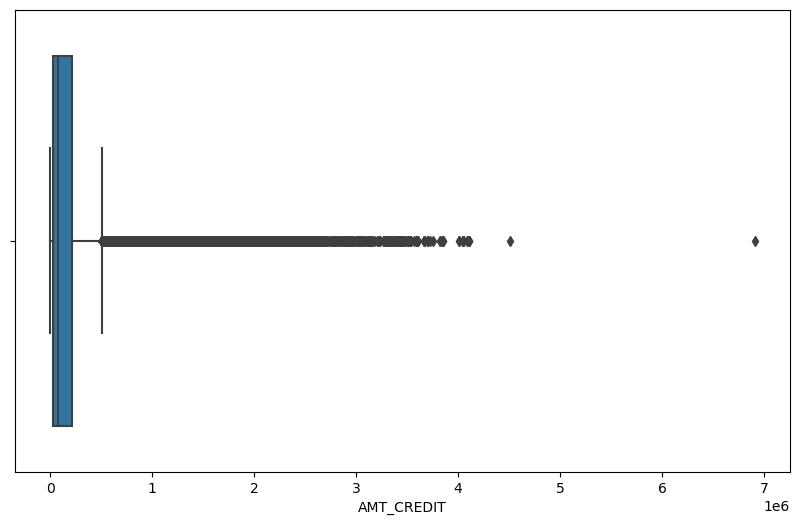

______________
99th percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


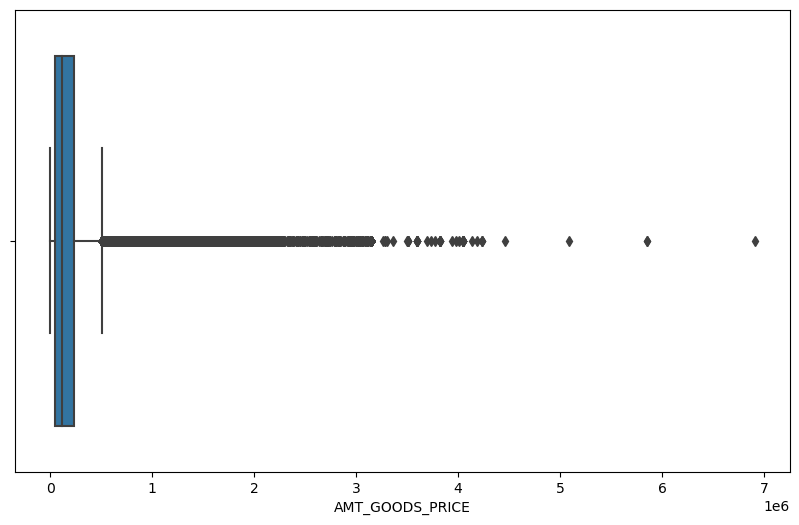

______________
99th percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


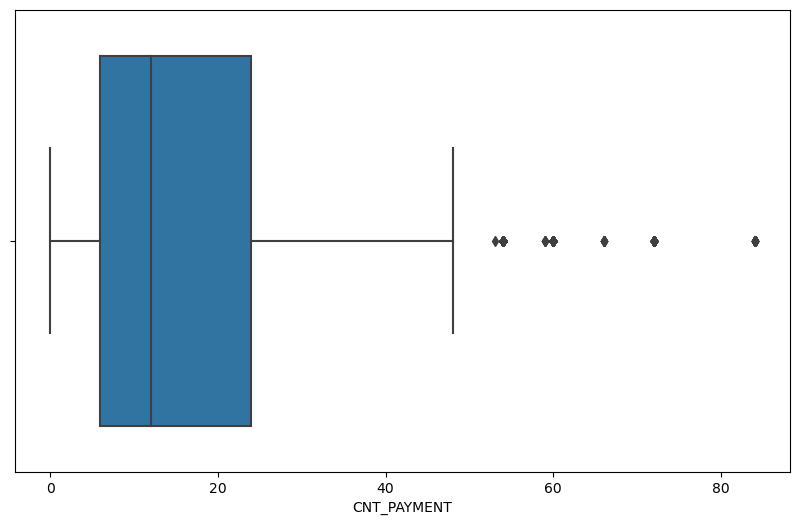

______________


In [157]:
#plot on numerical columns
for col in num_cols1:
    print("99th percentile",np.percentile(p[col],99))
    print(p[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=p,x=col)
    plt.show()
    print("______________")

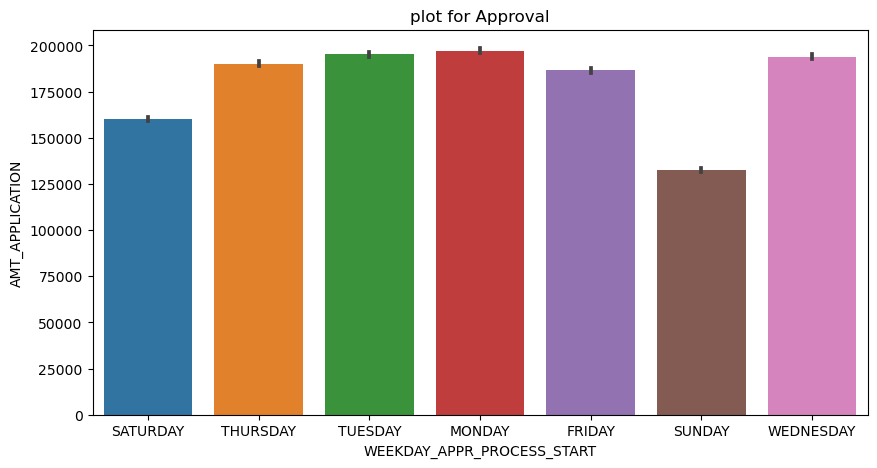

In [158]:
#bivariate analysis
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=approved)
plt.title("plot for Approval")
plt.show()

In [159]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=cancelled)
plt.title("plot for cancelled")
plt.show()

In [160]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=refused)
plt.title("plot for cancelled")
plt.show()

In [161]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=unused)
plt.title("plot for cancelled")
plt.show()

<Figure size 1500x1000 with 0 Axes>

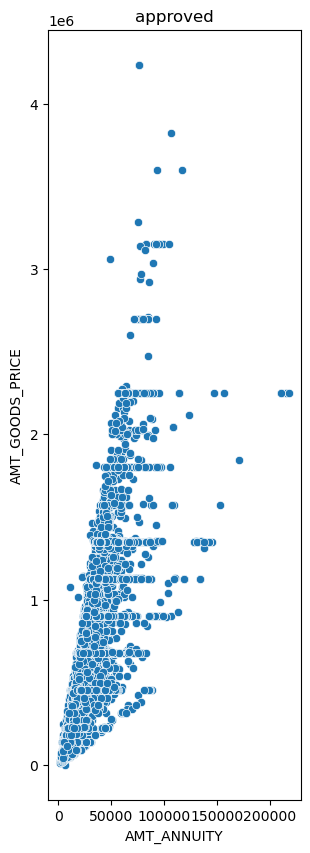

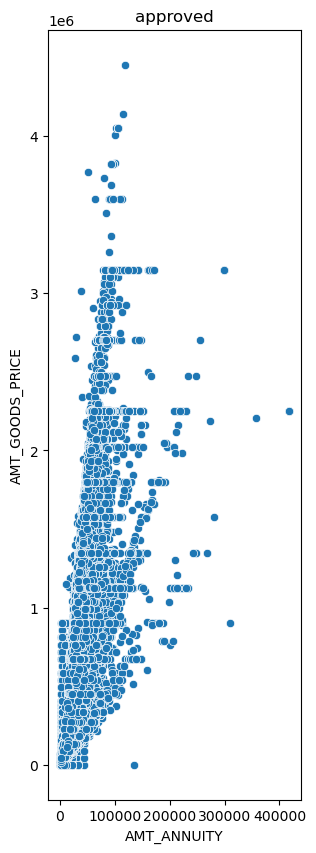

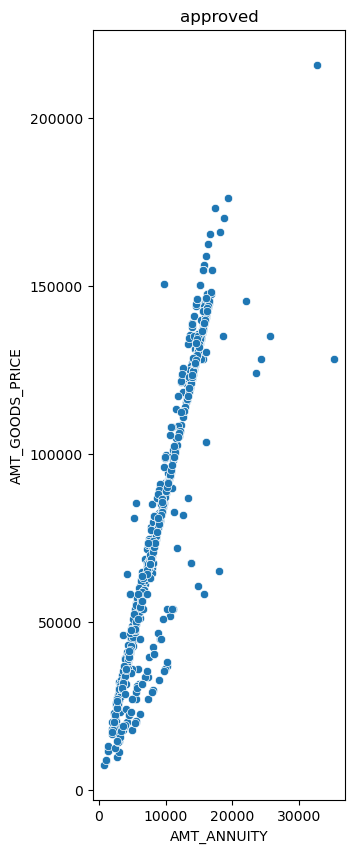

<Figure size 1500x1000 with 0 Axes>

In [166]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("approved")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE",data=approved)
plt.figure(figsize=(15,10))
plt.subplot(1,4,2)
plt.title("approved")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE",data=cancelled)
plt.figure(figsize=(15,10))
plt.subplot(1,4,3)
plt.title("approved")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE",data=refused)
plt.figure(figsize=(15,10))
plt.subplot(1,4,4)
plt.title("approved")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE",data=unused)
plt.figure(figsize=(15,10))


In [168]:
cor_approved=approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_GOODS_PRICE","CNT_PAYMENT"]]
cor_cancelled=cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_GOODS_PRICE","CNT_PAYMENT"]]
cor_refused=refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_GOODS_PRICE","CNT_PAYMENT"]]
cor_unused=unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_GOODS_PRICE","CNT_PAYMENT"]]

In [171]:
plt.figure(figsize=[10,10])
sns.heatmap(cor_approved.corr(),annot=True,cmap="Reds")
plt.title("heat map for approved")
plt.title("approved hm")

Text(0.5, 1.0, 'approved hm')

In [172]:
plt.figure(figsize=[10,10])
sns.heatmap(cor_cancelled.corr(),annot=True,cmap="Reds")
plt.title("heat map for cancelled")


Text(0.5, 1.0, 'heat map for cancelled')

Text(0.5, 1.0, 'heat map for refused')

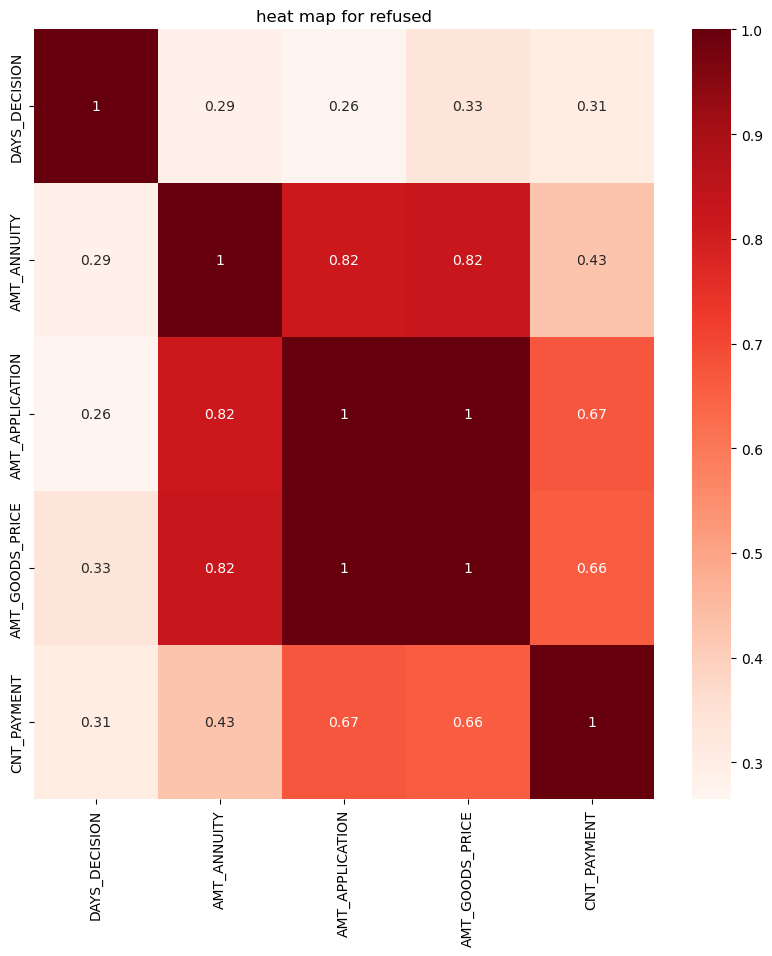

In [173]:
plt.figure(figsize=[10,10])
sns.heatmap(cor_refused.corr(),annot=True,cmap="Reds")
plt.title("heat map for refused")


Text(0.5, 1.0, 'heat map for unused')

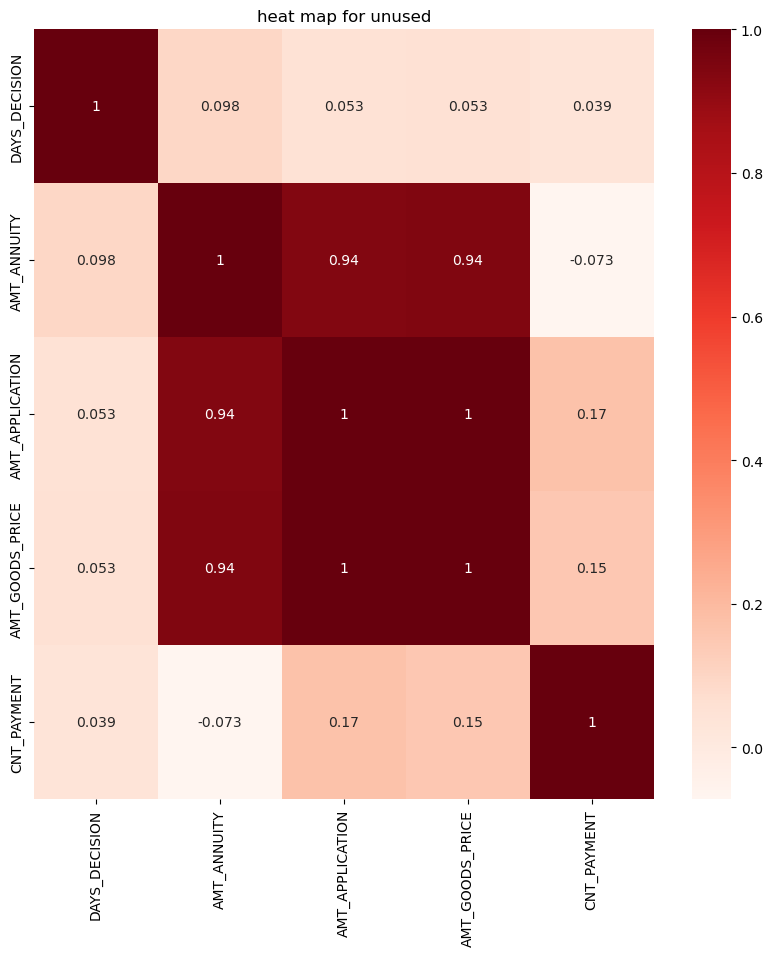

In [174]:
plt.figure(figsize=[10,10])
sns.heatmap(cor_unused.corr(),annot=True,cmap="Reds")
plt.title("heat map for unused")


In [187]:
merge_df=a.merge(p,on=['SK_ID_CURR'],how='left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               9461   
1                    0.003541       16765           1188              16765   
2                    0.003541       16765           1188              16765   
3                    0.003541       16765           1188              16765   
4                    0.010032       19046            225              19046   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0      Core staff             2.0   
3                 1           1           0      Core staff             2.0   
4                 1           1           0        Laborers             1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [188]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 116 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(38), int64(47), object(29)
memory usage: 1.2+ GB


In [190]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1, inplace=True)

In [192]:
merge_df.shape

(1430155, 87)

In [195]:
res1=pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"], columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc="mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='NAME_INCOME_TYPE-NAME_CLIENT_TYPE'>

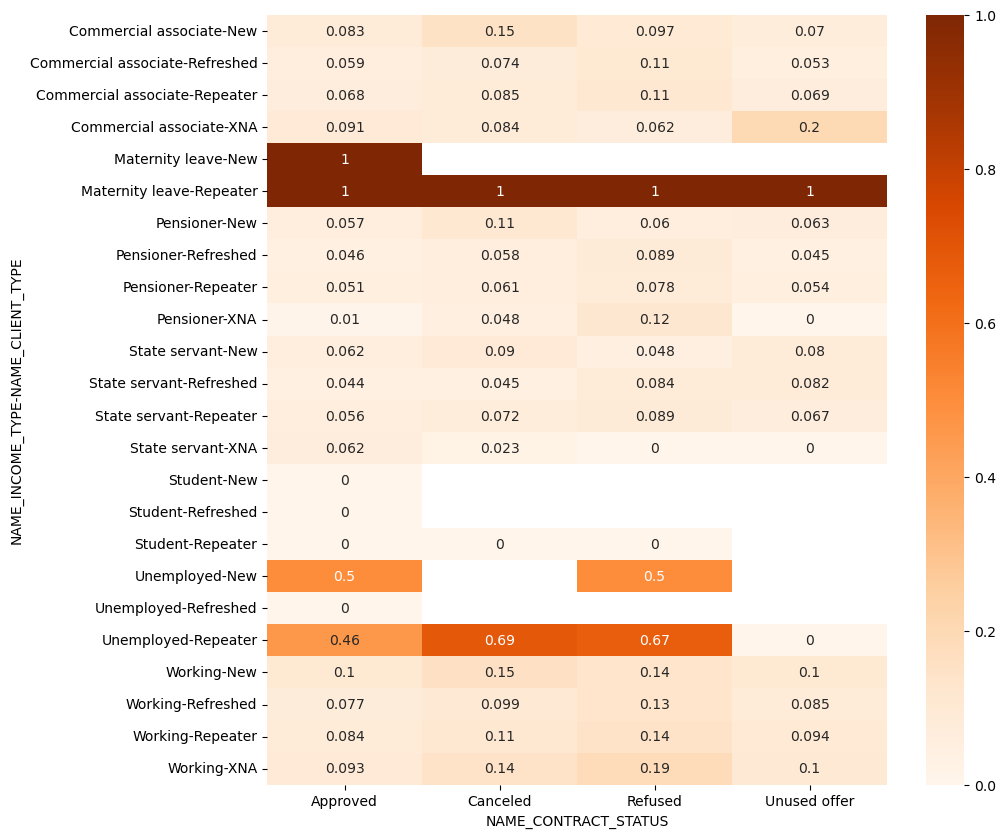

In [198]:
plt.figure(figsize=[10,10])
sns.heatmap(res1,annot=True,cmap="Oranges")

In [204]:
res2=pd.pivot_table(data=merge_df,index=["CODE_GENDER","NAME_SELLER_INDUSTRY"], columns=["TARGET"],values="AMT_GOODS_PRICE_x",aggfunc='sum')


In [205]:
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

In [206]:
plt.figure(figsize=[10,10])
sns.heatmap(res2,annot=True,cmap="Oranges")

<Axes: xlabel='TARGET', ylabel='CODE_GENDER-NAME_SELLER_INDUSTRY'>